In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("data/NHIS_OPEN_GJ_2017.CSV", encoding="cp949")

In [4]:
df.shape

(1000000, 34)

In [5]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [6]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,27.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,1,11,41,160,70,90.5,1.0,1.5,...,36.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [7]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
546685,2017,546686,1,11,47,160,70,96.1,1.0,1.2,...,80.0,3.0,1.0,1,NaN,NaN,NaN,NaN,2.0,20181126


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [9]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [10]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

In [11]:
df.isnull()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [12]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

TypeError: barh() missing 2 required positional arguments: 'y' and 'width'

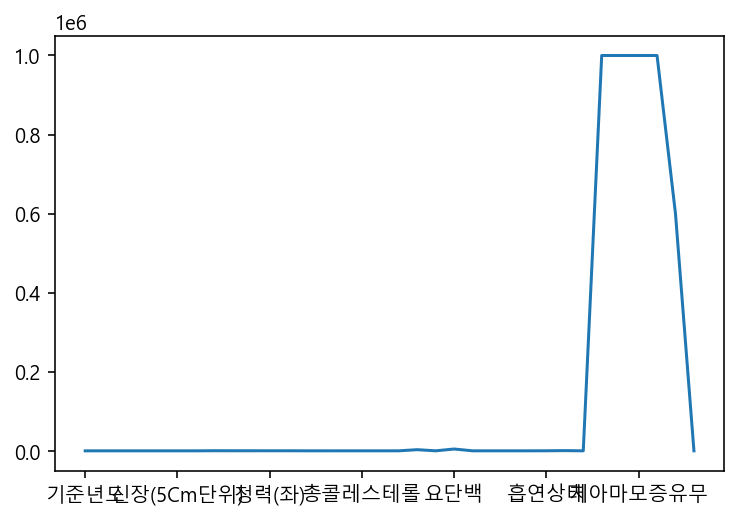

In [13]:
df.isnull().sum().plot().barh(figsize=(10, 9))

In [14]:
df["(혈청지오티)ALT"]

0         35.0
1         36.0
2         32.0
3         34.0
4         12.0
          ... 
999995    36.0
999996    17.0
999997    27.0
999998    14.0
999999    43.0
Name: (혈청지오티)ALT, Length: 1000000, dtype: float64

In [15]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]]

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0
...,...,...
999995,36.0,26.0
999996,17.0,14.0
999997,27.0,30.0
999998,14.0,21.0


In [16]:
df["(혈청지오티)ALT"].head()

0    35.0
1    36.0
2    32.0
3    34.0
4    12.0
Name: (혈청지오티)ALT, dtype: float64

In [17]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0


In [18]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


In [19]:
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [20]:
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

In [21]:
df.groupby(["성별코드"]).mean()

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2017.0,499656.610053,10.308458,34.098773,168.537858,70.120963,85.079026,1.036886,1.035752,1.032173,...,49.445130,2.062924,0.672553,0.435324,NaN,NaN,NaN,NaN,0.639805,20181126.0
2,2017.0,500388.929624,10.773935,33.238046,155.101397,55.528972,76.883707,0.916758,0.912829,1.031174,...,23.335241,1.093455,0.303534,0.361215,NaN,NaN,NaN,NaN,0.550845,20181126.0


In [22]:
df.groupby(["신장(5Cm단위)","성별코드"]).mean()

기준년도        가입자일련번호  연령대코드(5세단위)       시도코드  체중(5Kg단위)  \
신장(5Cm단위) 성별코드                                                             
130       2     2017.0  498067.182796    17.139785  39.709677  36.182796   
135       2     2017.0  503290.204458    16.137586  38.458878  42.117602   
140       1     2017.0  544480.833333    15.000000  26.000000  40.000000   
          2     2017.0  507256.562601    14.840613  35.917395  47.558503   
145       1     2017.0  513768.292929    15.000000  39.232323  48.787879   
          2     2017.0  501788.010454    13.414458  34.659554  51.093224   
150       1     2017.0  496424.508038    14.050234  35.237776  53.367381   
          2     2017.0  500262.945441    11.993765  33.775869  53.594743   
155       1     2017.0  502210.684648    13.104399  34.605708  57.883796   
          2     2017.0  500616.429368    10.685710  33.240981  55.596715   
160       1     2017.0  499697.320320    12.120394  34.388151  62.313964   
          2     2017.0  500206.012507     9.521845  32.666770  57.506002   
165       1     2017.0  500418.640290    11.008215  34.352229  66.795868   
          2     2017.0  498652.016286     8.553731  31.935752  59.717870   
170       1     2017.0  498814.721595     9.881384  34.073075  71.453931   
          2     2017.0  494346.023008     7.785223  30.700071  61.758776   
175       1     2017.0  499856.603144     8.990231  33.835960  76.036641   
          2     2017.0  509249.861804     7.264875  27.750480  63.166987   
180       1     2017.0  498141.575830     8.300061  33.374344  80.810673   
185       1     2017.0  502611.924887     7.780845  32.528054  85.359729   
190       1     2017.0  502235.646575     7.484932  28.934247  90.054795   

                     허리둘레     시력(좌)     시력(우)     청력(좌)     청력(우)  ...  \
신장(5Cm단위) 성별코드                                                     ...   
130       2     77.656989  0.585870  0.577174  1.225806  1.204301  ...   
135       2     78.771055  0.629012  0.662654  1.180416  1.171164  ...   
140       1     75.900000  0.600000  0.666667  1.000000  1.000000  ...   
          2     79.745890  0.717397  0.749816  1.128034  1.130083  ...   
145       1     79.503030  0.706061  0.779798  1.151515  1.111111  ...   
          2     79.194438  0.795237  0.797265  1.080546  1.079027  ...   
150       1     81.186303  0.866175  0.863551  1.121567  1.124916  ...   
          2     77.898814  0.864182  0.860134  1.044318  1.043335  ...   
155       1     82.269057  0.911954  0.909114  1.088454  1.081986  ...   
          2     76.668980  0.925450  0.921709  1.024382  1.024734  ...   
160       1     83.317348  0.957831  0.957808  1.060845  1.057975  ...   
          2     75.824422  0.973331  0.965504  1.012252  1.011811  ...   
165       1     84.292447  1.011704  1.009693  1.038999  1.037038  ...   
          2     75.523731  1.008206  0.999729  1.006722  1.006882  ...   
170       1     85.293630  1.057328  1.058412  1.023125  1.022050  ...   
          2     75.037426  1.021421  1.017293  1.004626  1.003915  ...   
175       1     86.445532  1.091578  1.088021  1.013710  1.012831  ...   
          2     74.248177  1.017658  1.024952  1.003839  1.001919  ...   
180       1     87.814739  1.111497  1.109306  1.008209  1.007573  ...   
185       1     89.236602  1.122564  1.120769  1.005129  1.007090  ...   
190       1     90.738082  1.129041  1.131507  1.010959  1.002740  ...   

                    감마지티피      흡연상태      음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
신장(5Cm단위) 성별코드                                                            
130       2     20.161290  1.000000  0.021505  0.053763      NaN    NaN   
135       2     24.594158  1.030746  0.047656  0.163720      NaN    NaN   
140       1     28.833333  1.166667  0.333333  0.666667      NaN    NaN   
          2     25.959448  1.033549  0.082659  0.242748      NaN    NaN   
145       1     36.535354  1.757576  0.373737  0.252525      NaN    NaN   
          2     26.234344  1.050881  0.14

In [23]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [24]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [25]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [26]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [27]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

In [28]:
df.pivot

<bound method DataFrame.pivot of         기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
0       2017        1     1            8    43        170         75  90.0   
1       2017        2     1            7    11        180         80  89.0   
2       2017        3     1            9    41        165         75  91.0   
3       2017        4     1           11    48        175         80  91.0   
4       2017        5     1           11    30        165         60  80.0   
...      ...      ...   ...          ...   ...        ...        ...   ...   
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지

In [29]:
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")

,가입자일련번호
성별코드,
1,530410
2,469590


In [30]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
0.0,500439
1.0,499025


In [31]:
pd.pivot_table(df, index="음주여부", values="감마지티피")

,감마지티피
음주여부,
0.0,26.819650
1.0,47.588675


In [32]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.819650,19.0
1.0,47.588675,30.0


In [33]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,500417.0,999.0,26.819650,1.0,30.639714
1.0,18.0,30.0,52.0,499005.0,999.0,47.588675,1.0,63.056912


In [34]:
pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
0.0  1     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     2     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
1.0  1     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
     2     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

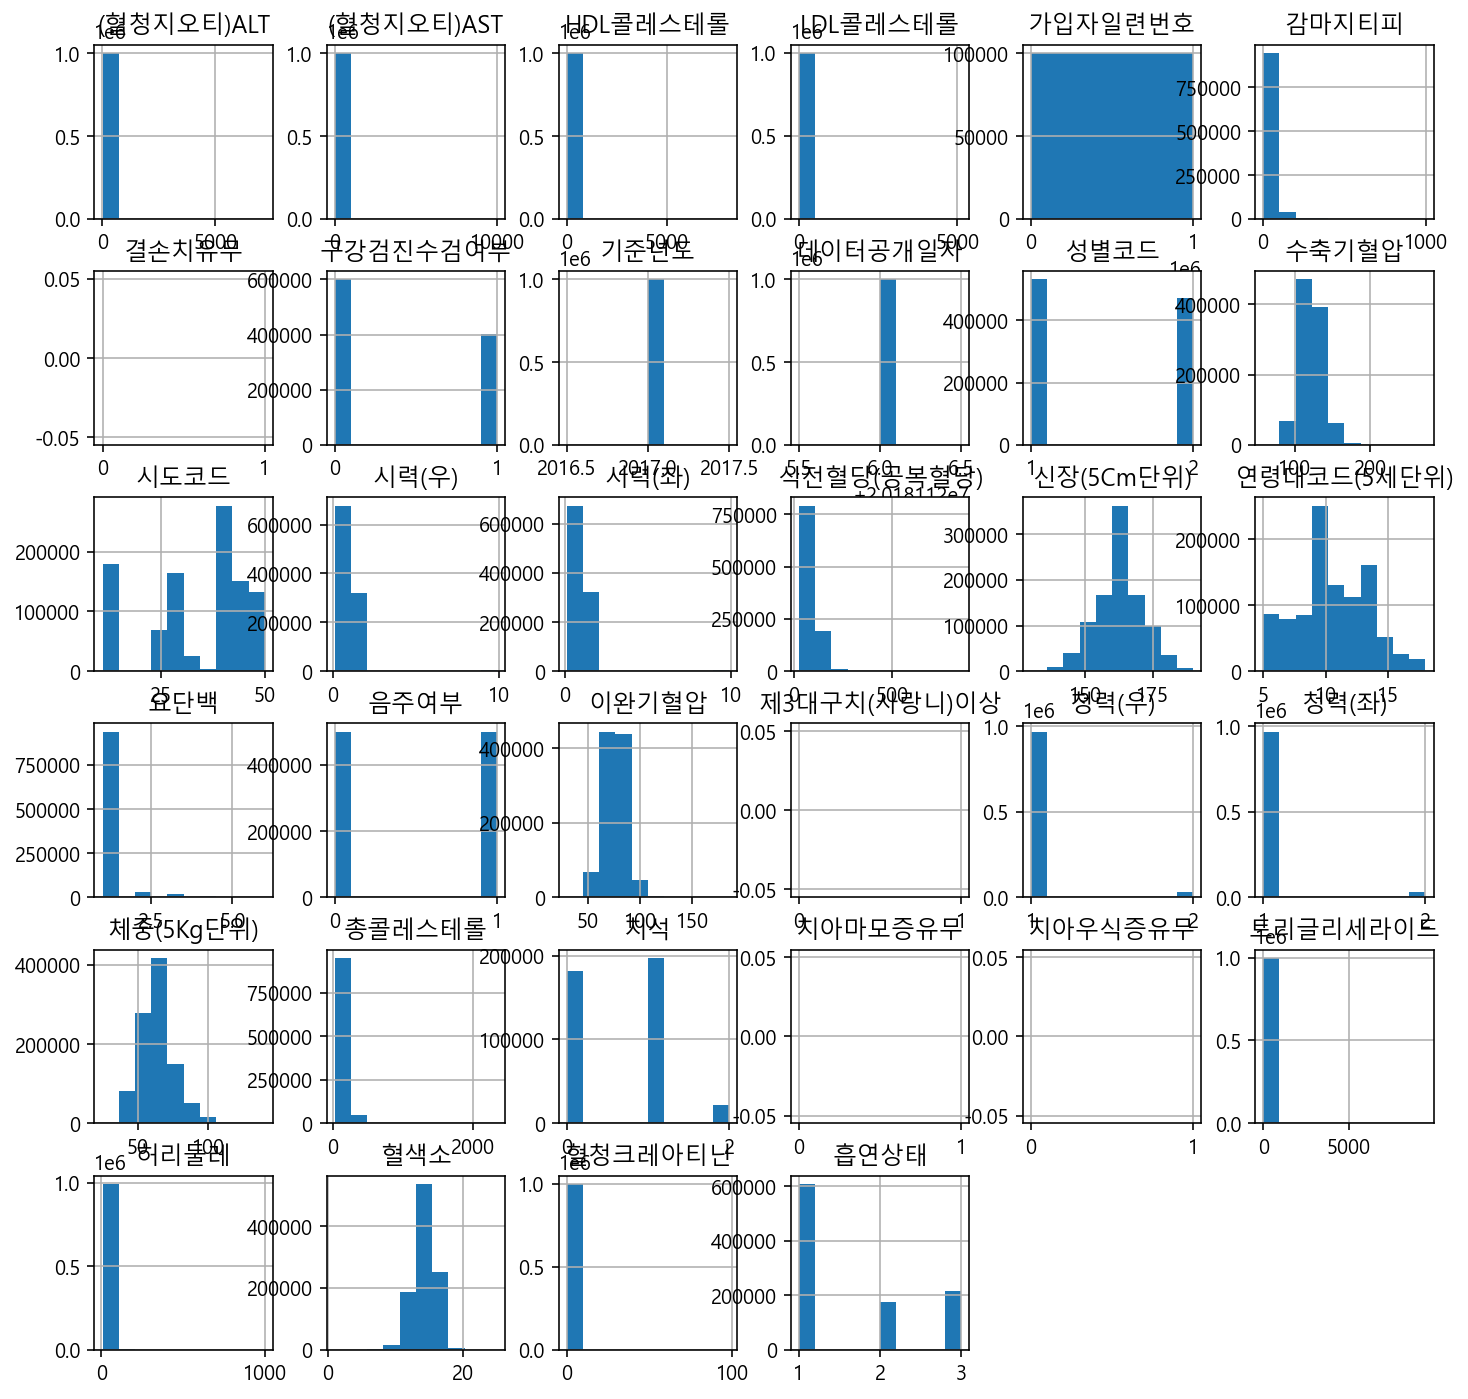

In [35]:
h = df.hist(figsize=(12, 12))

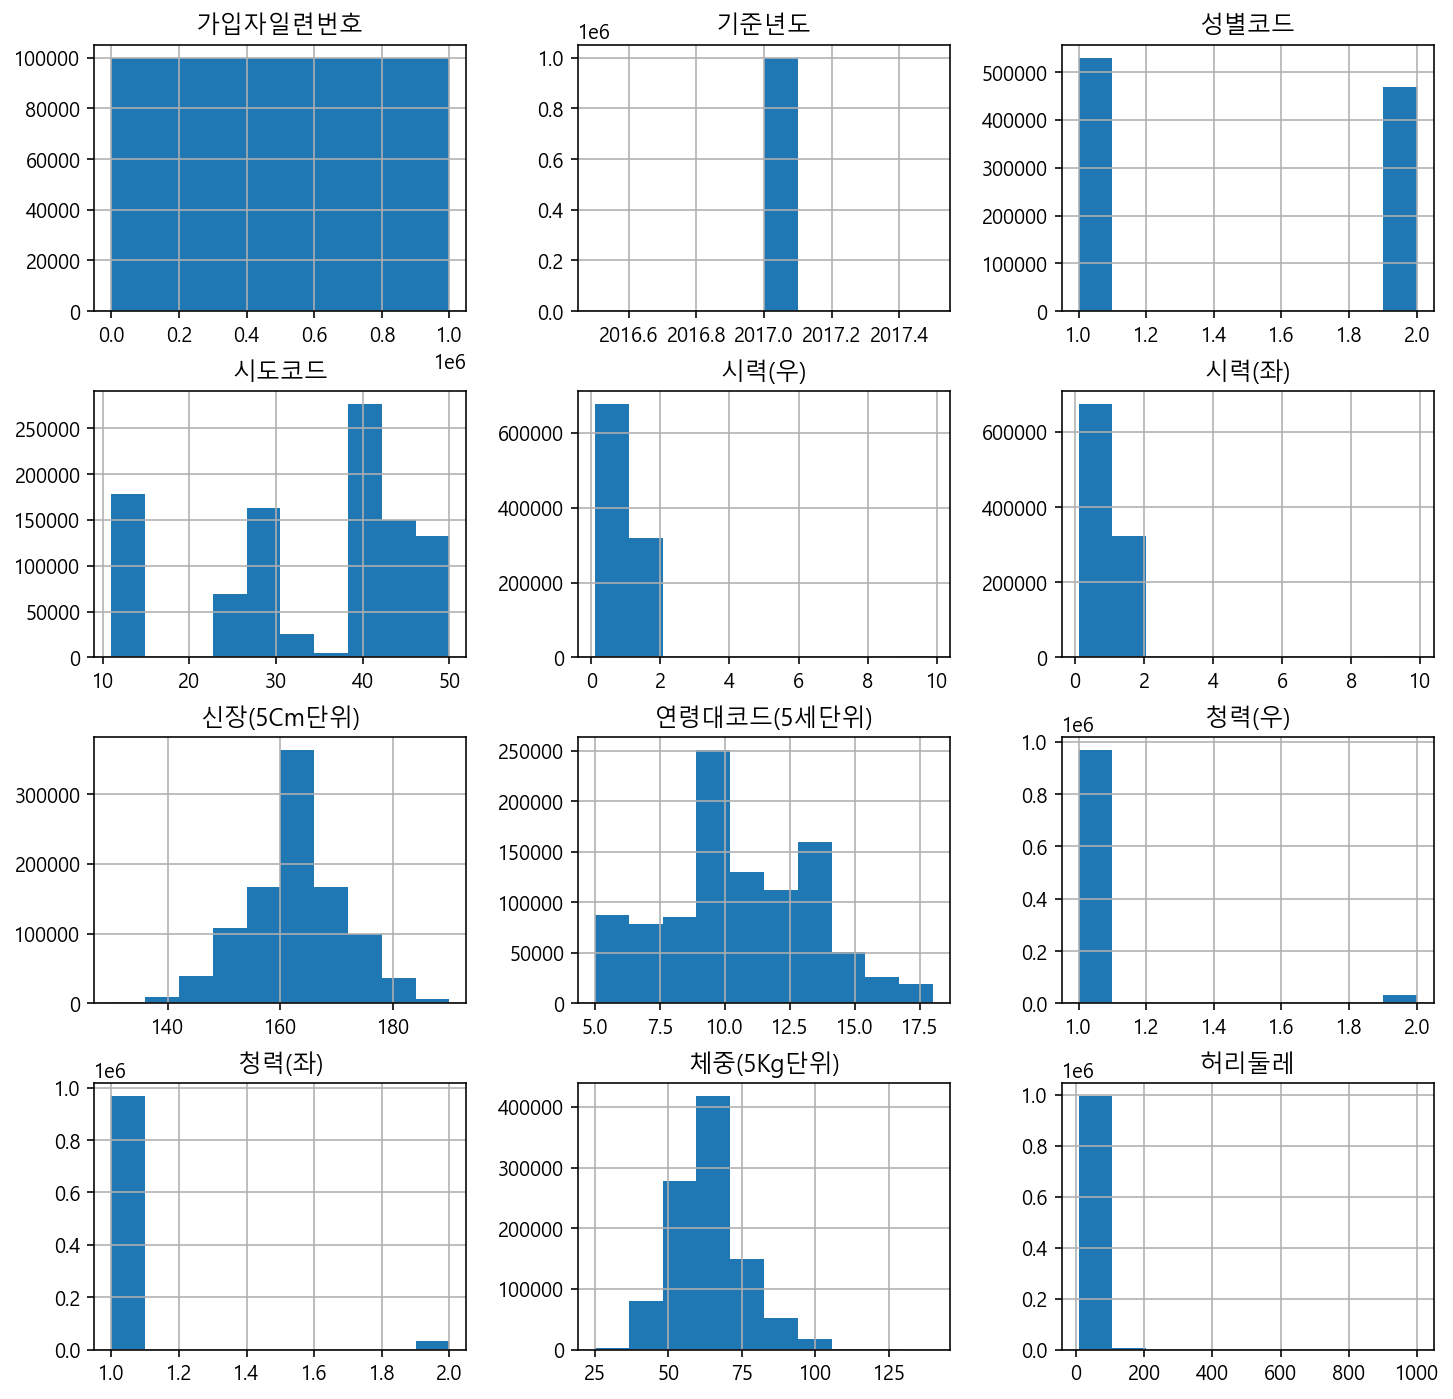

In [36]:
h = df.iloc[:, :12].hist(figsize=(12, 12))

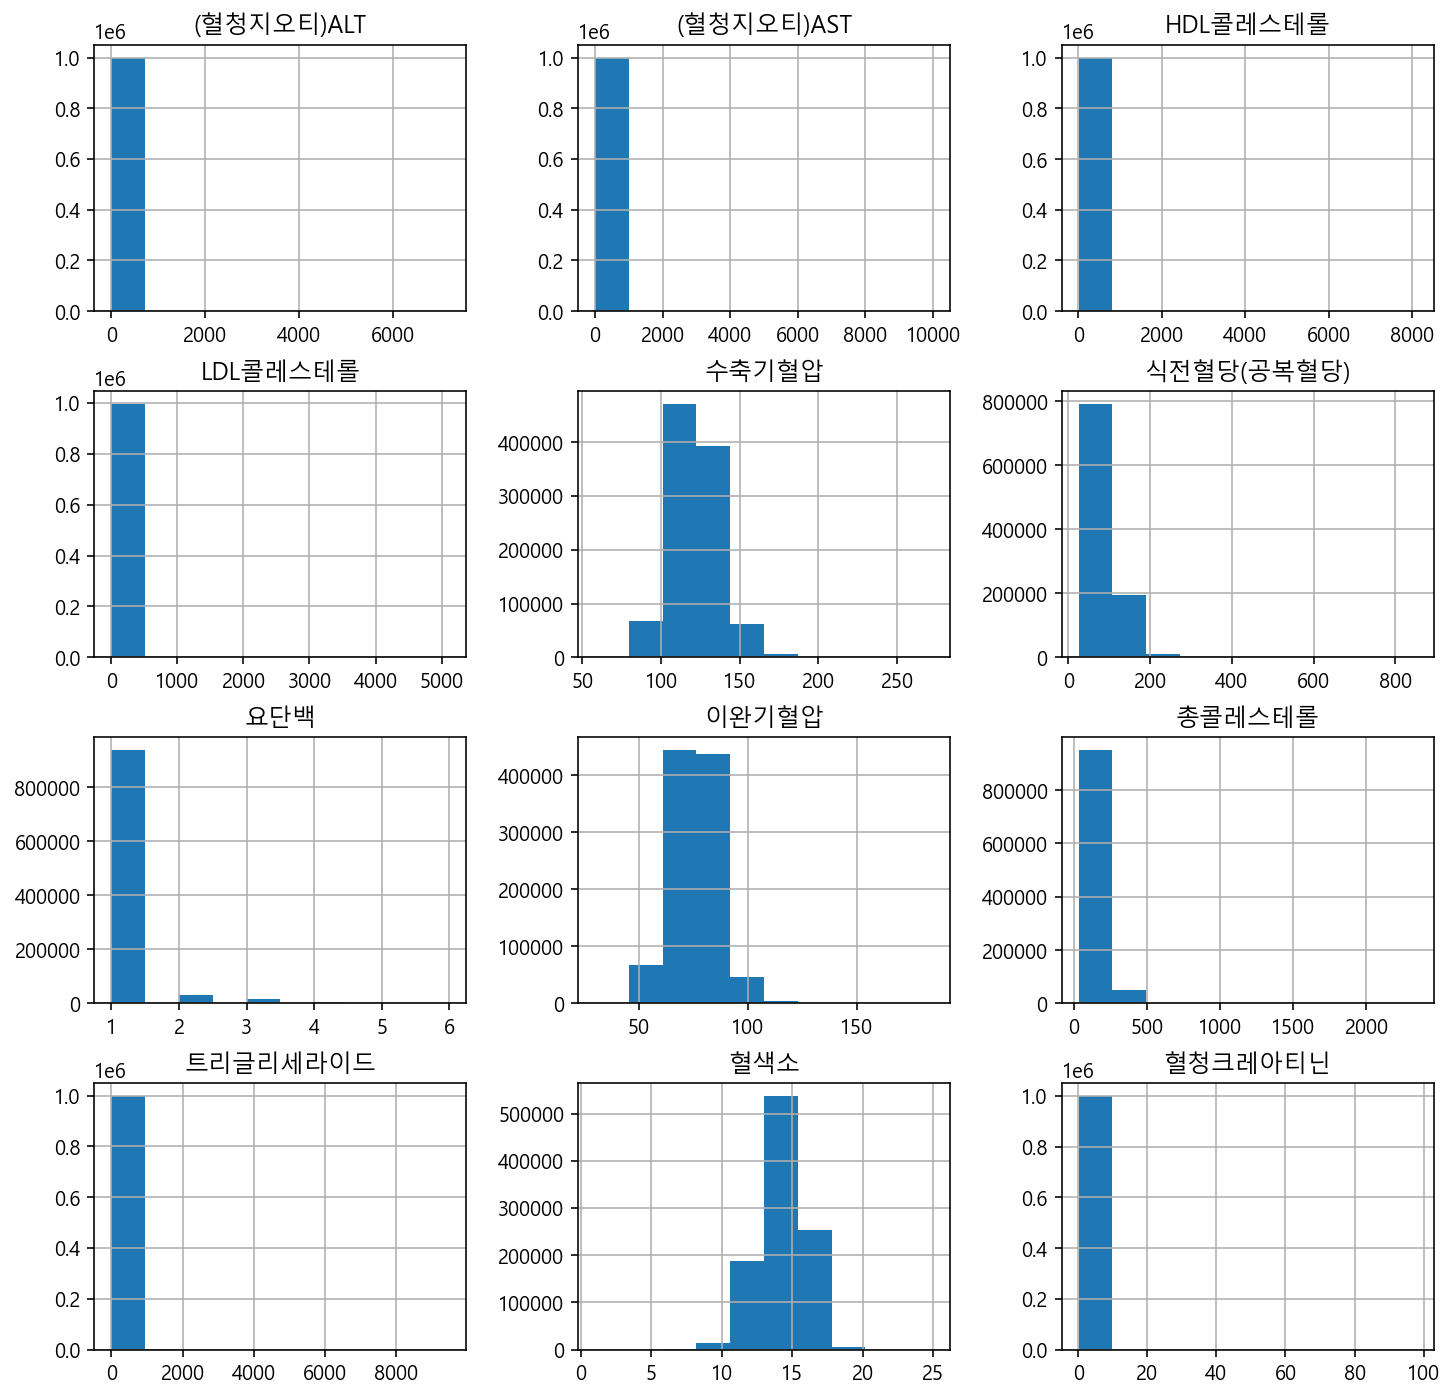

In [37]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12))

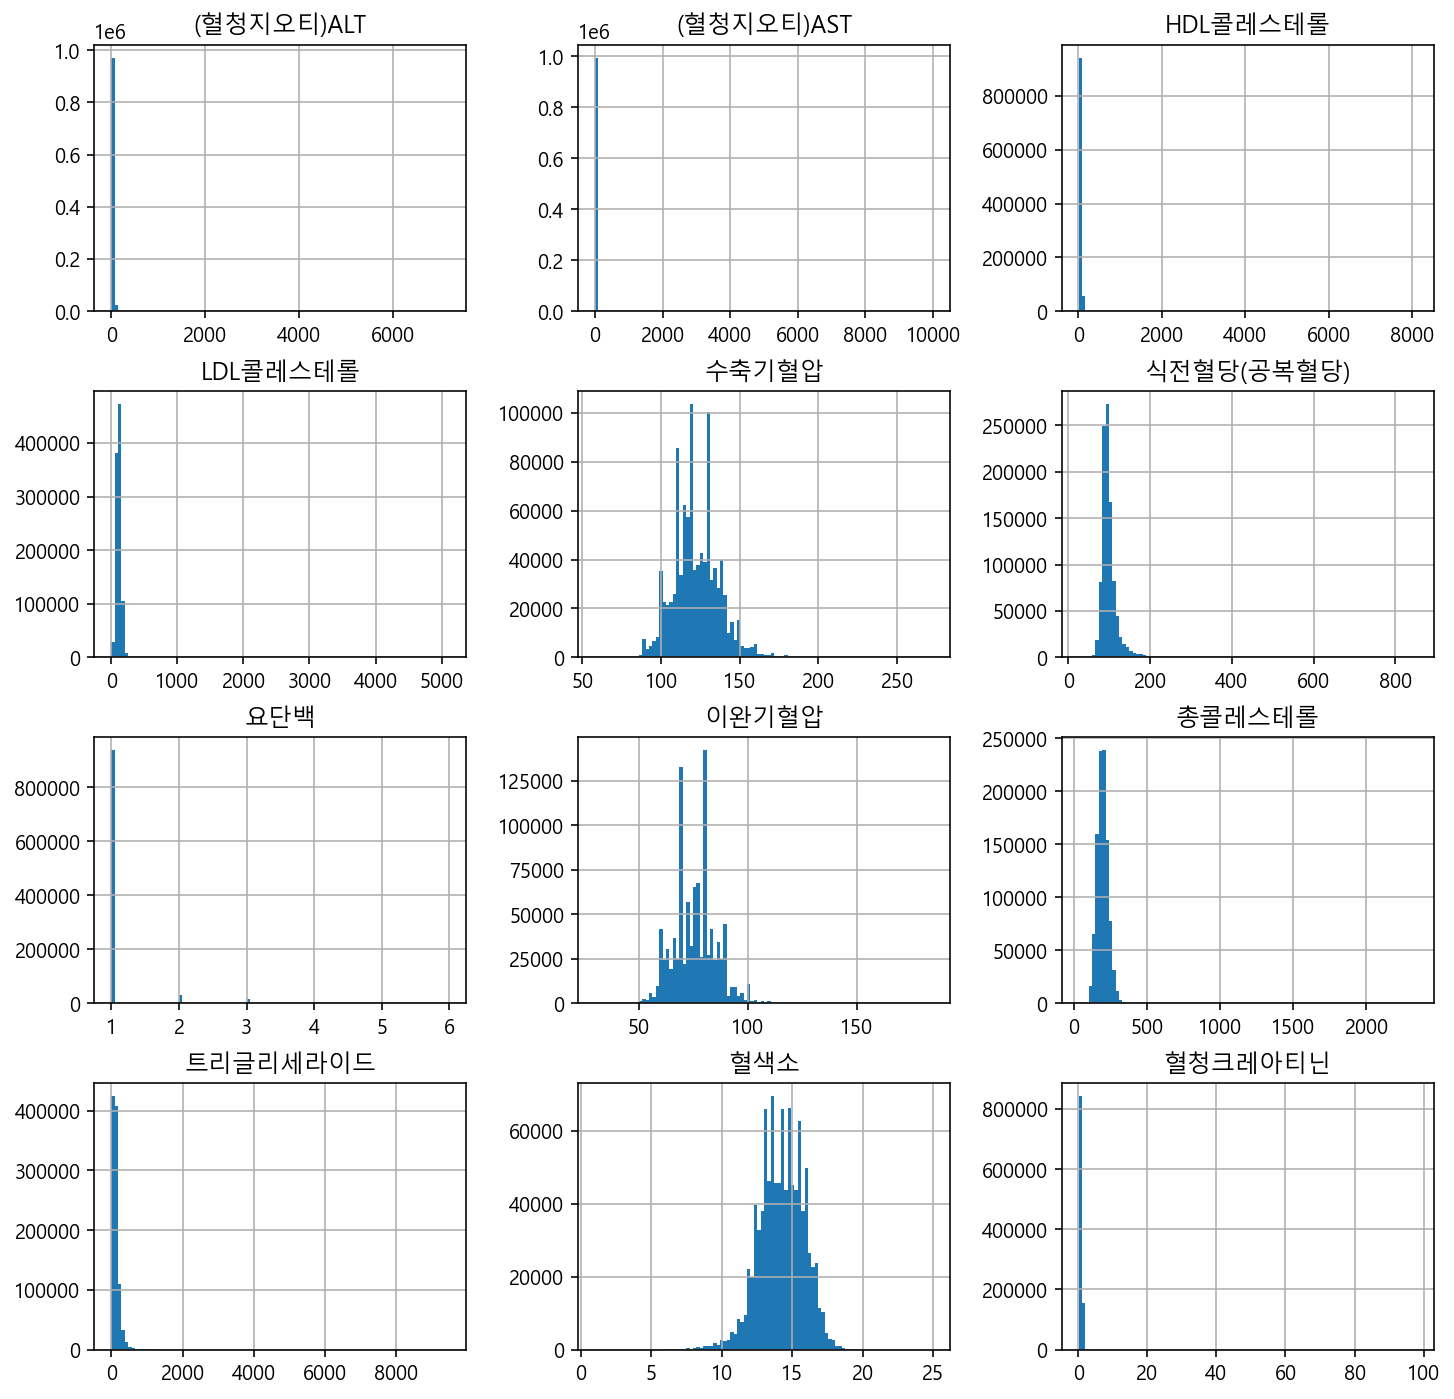

In [38]:
h = df.iloc[:, 12:24].hist(figsize = (12, 12), bins=100)

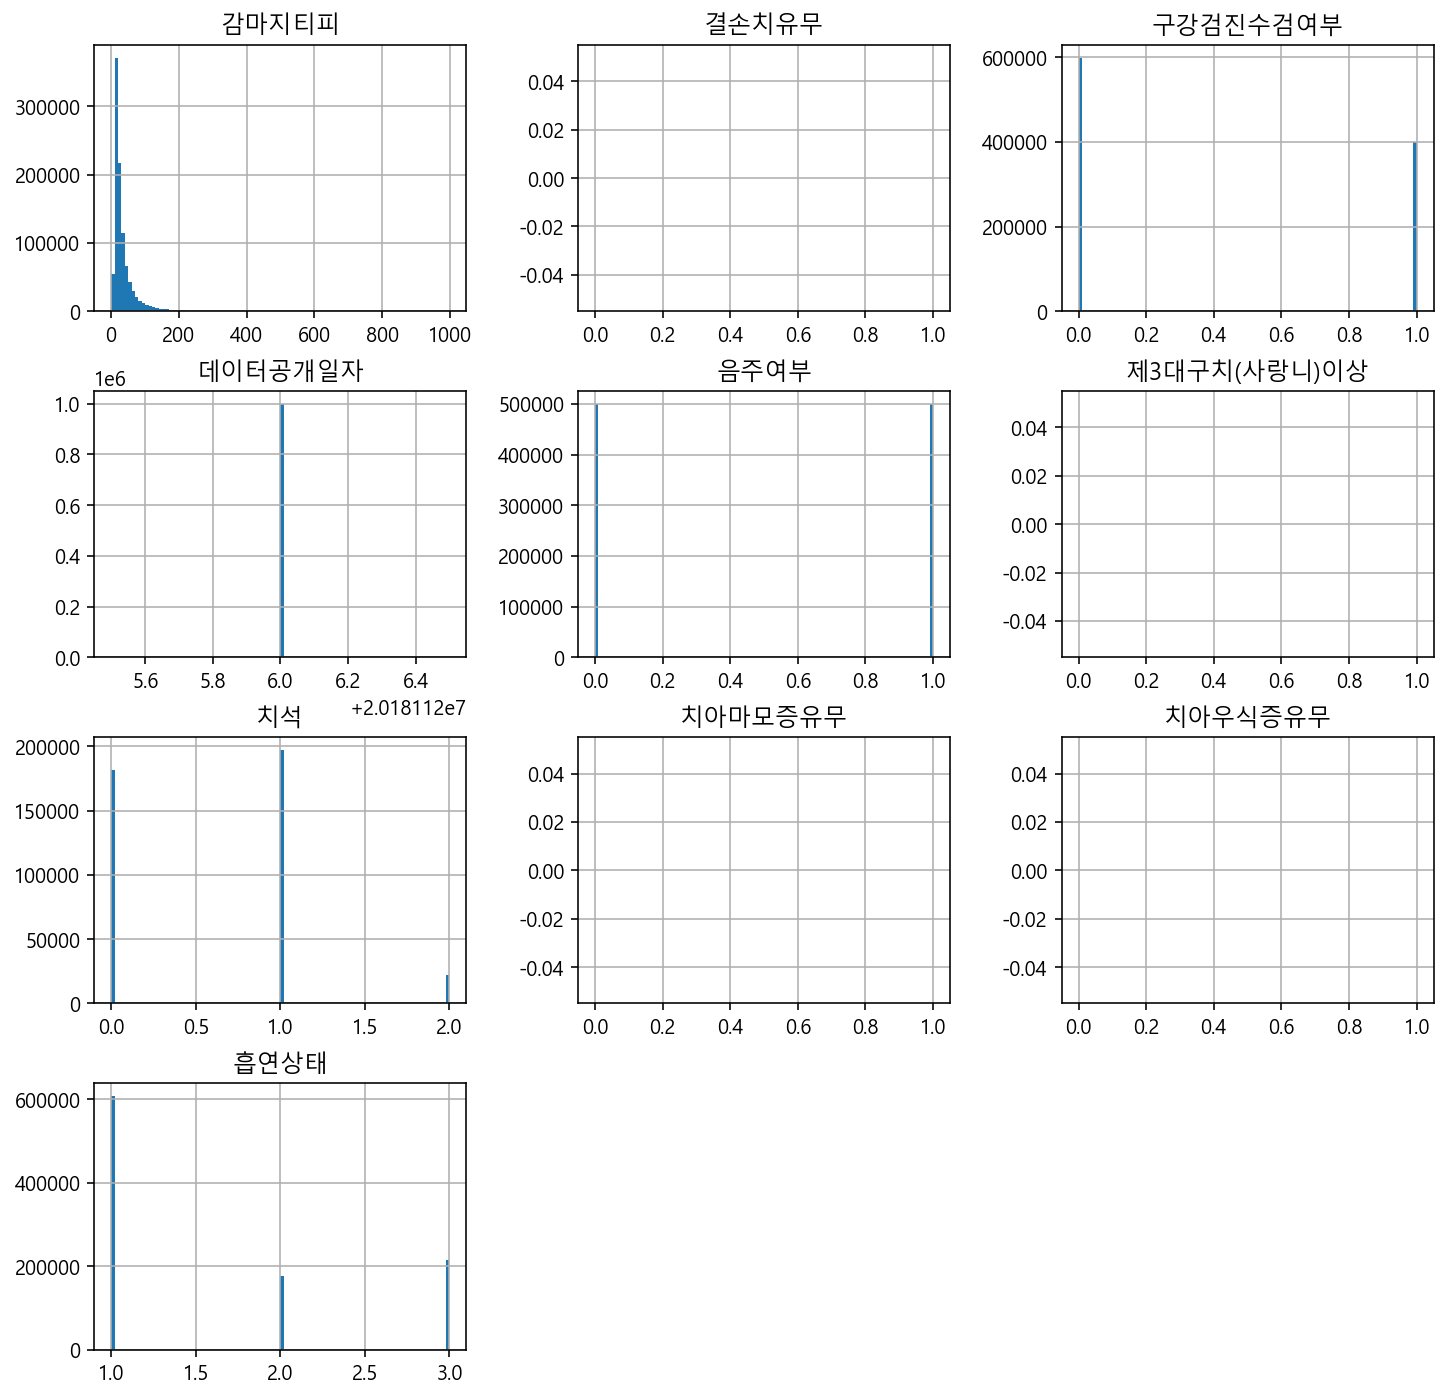

In [39]:
h = df.iloc[:, 24:].hist(figsize = (12, 12), bins=100)

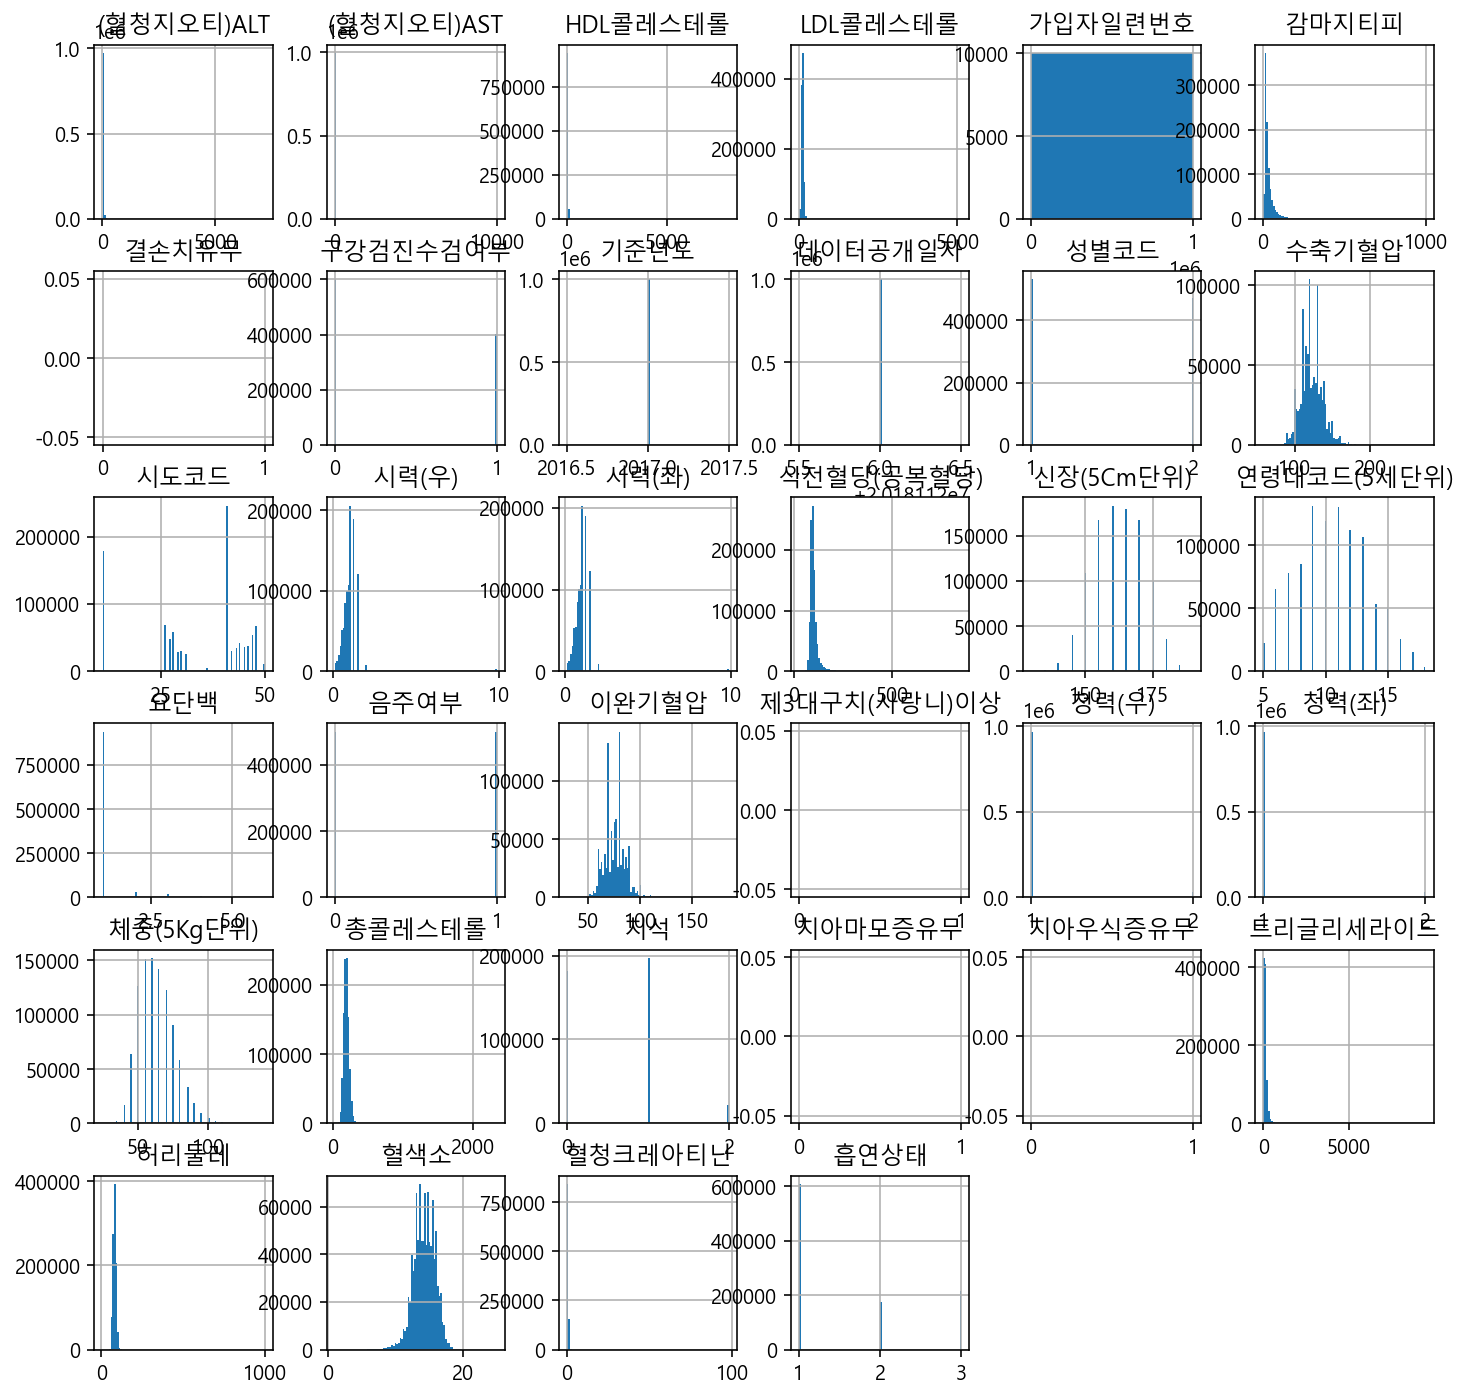

In [40]:
h = df.iloc[:,:].hist(figsize = (12, 12), bins=100)

In [41]:
df.sample(1000, random_state=1)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
276826,2017,276827,1,12,41,160,55,77.0,0.9,0.9,...,38.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
849425,2017,849426,1,9,31,170,75,89.9,1.0,1.0,...,28.0,3.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
504499,2017,504500,1,8,42,170,75,86.3,1.5,1.5,...,121.0,3.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
601054,2017,601055,1,14,31,170,70,84.0,0.8,0.9,...,31.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
980221,2017,980222,1,17,41,160,60,86.0,0.7,0.5,...,28.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,2017,890014,2,8,41,155,80,98.0,0.2,0.2,...,39.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
875389,2017,875390,1,11,41,170,60,81.0,1.0,0.9,...,59.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
358458,2017,358459,1,9,11,170,90,101.0,1.2,1.2,...,41.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
808228,2017,808229,1,11,28,160,65,85.0,0.6,0.9,...,37.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


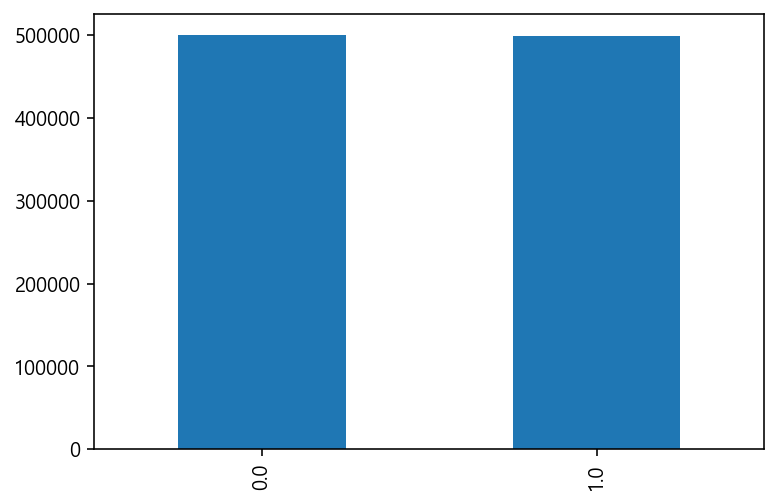

In [42]:
df["음주여부"].value_counts().plot.bar()

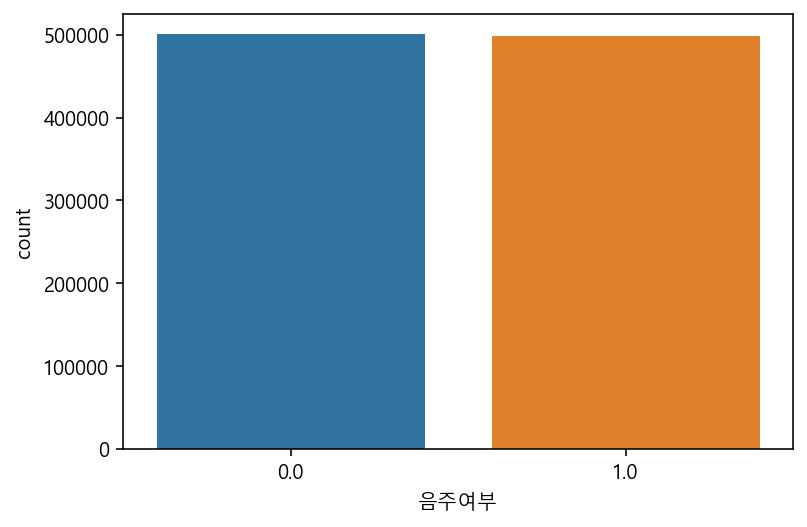

In [43]:
sns.countplot(x="음주여부", data=df)

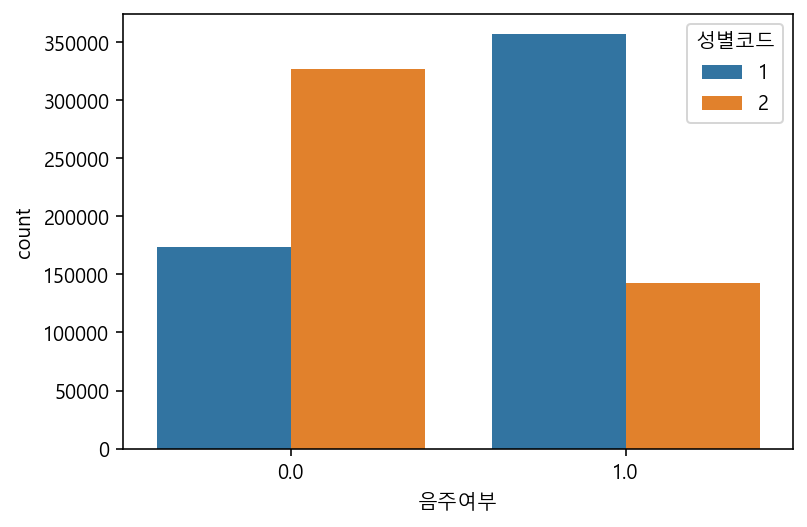

In [44]:
sns.countplot(x="음주여부", data=df, hue="성별코드")

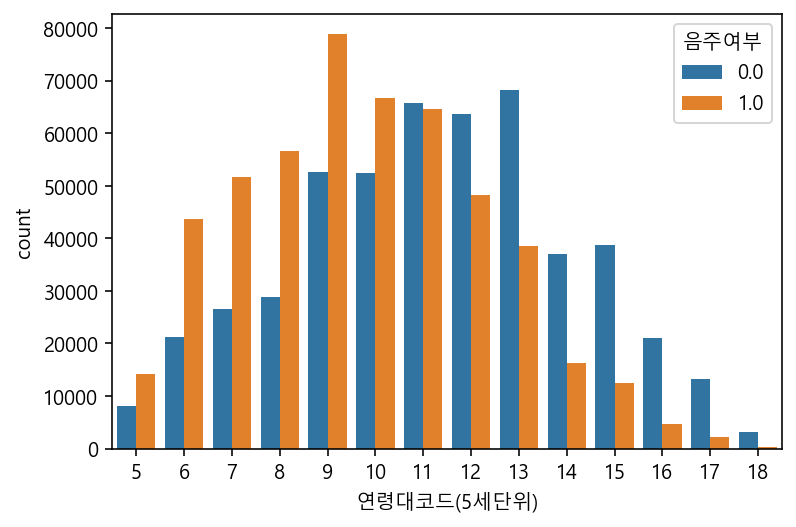

In [45]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

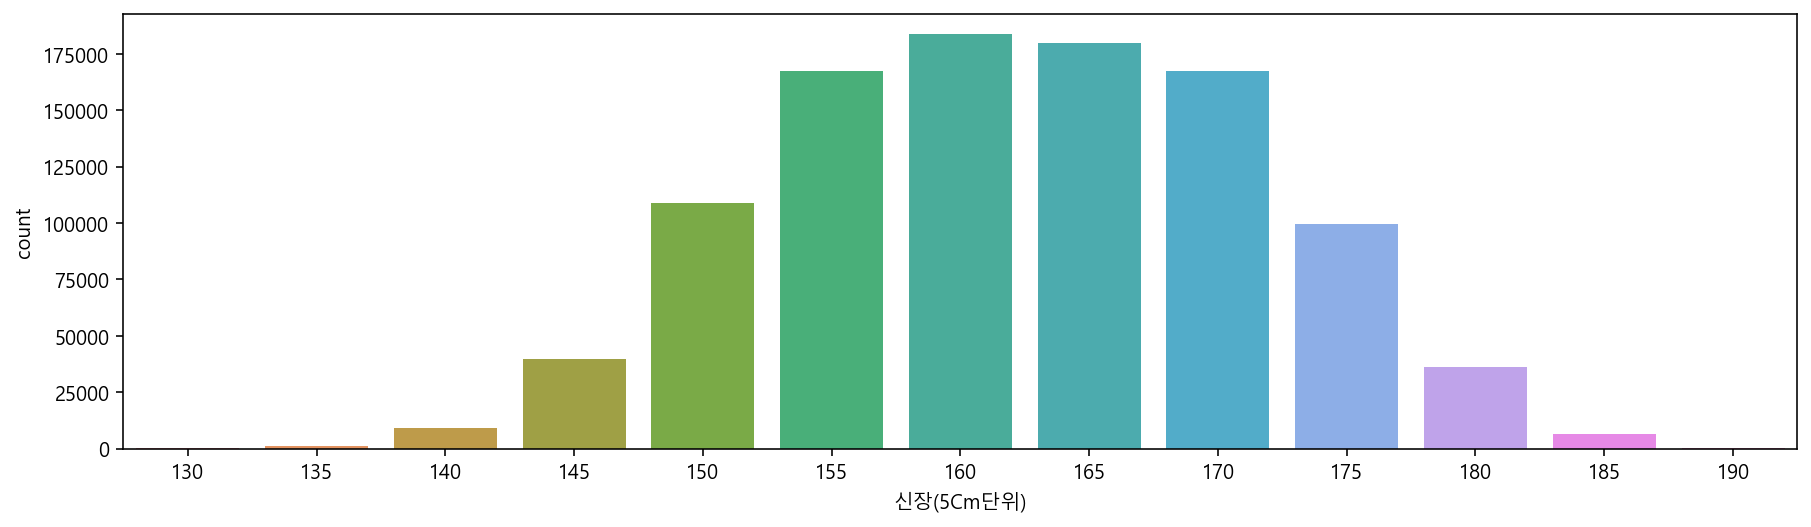

In [46]:
plt.figure(figsize=(15,4))

sns.countplot(data=df, x="신장(5Cm단위)")

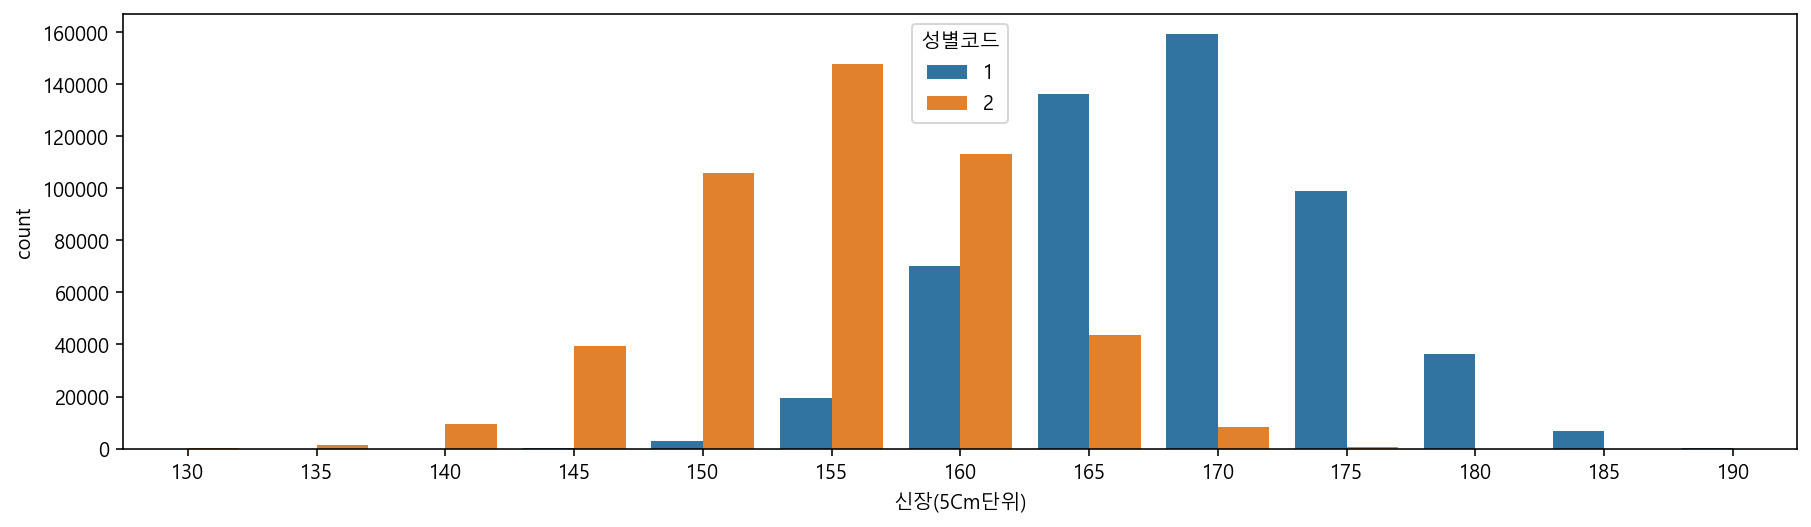

In [47]:
plt.figure(figsize=(15,4))

sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

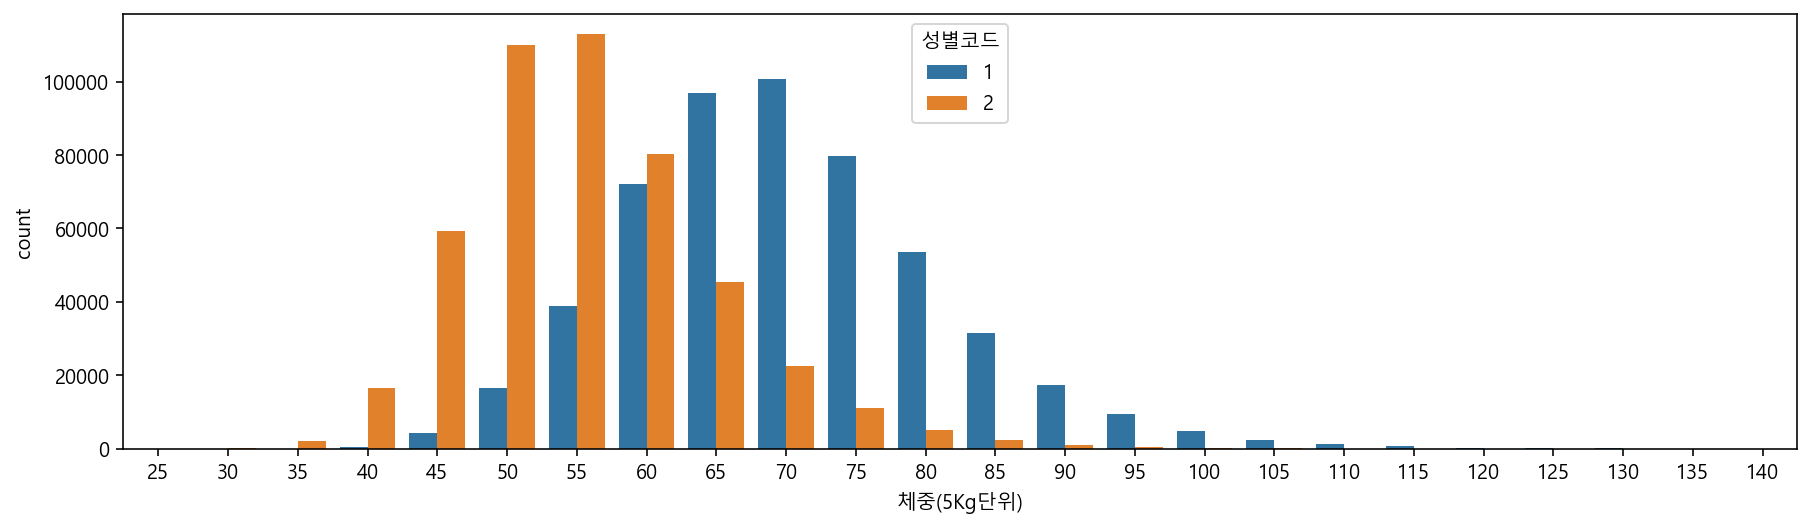

In [48]:
plt.figure(figsize=(15,4))

sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

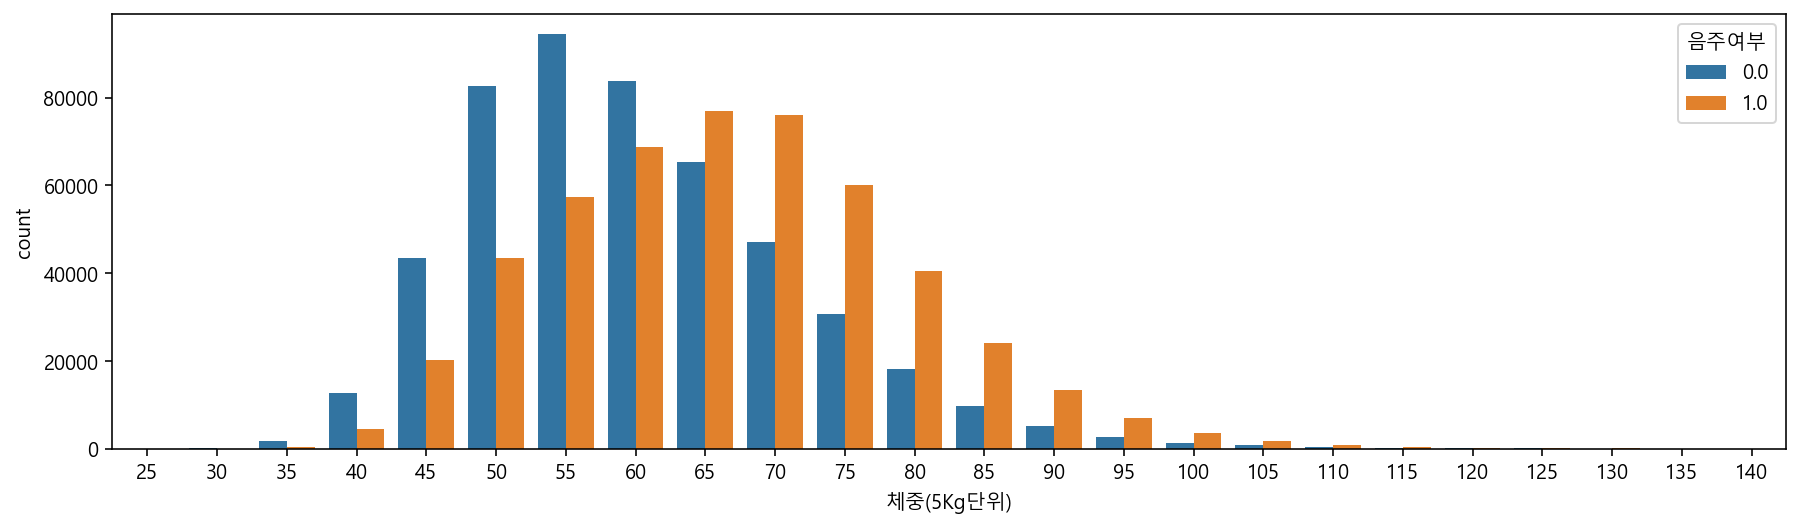

In [49]:
plt.figure(figsize=(15,4))

sns.countplot(data=df, x="체중(5Kg단위)", hue="음주여부")


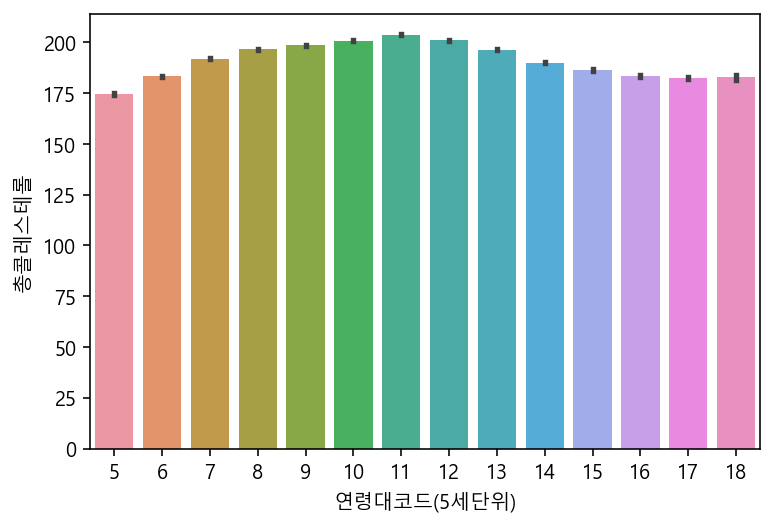

In [50]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤")

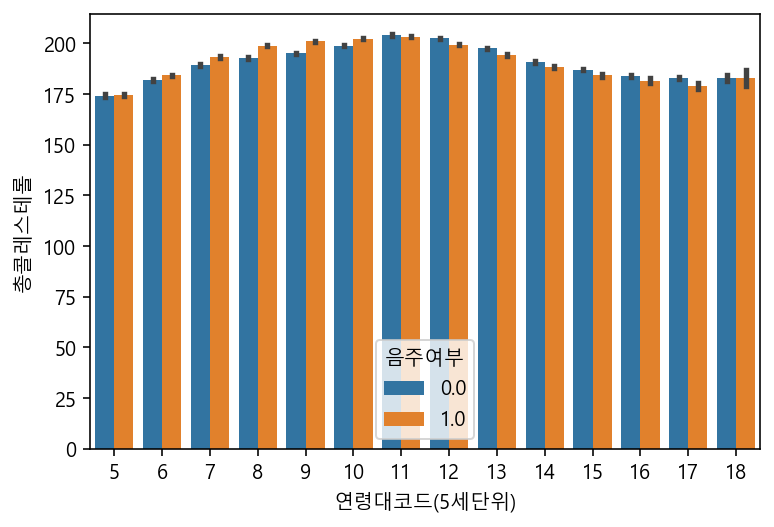

In [51]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

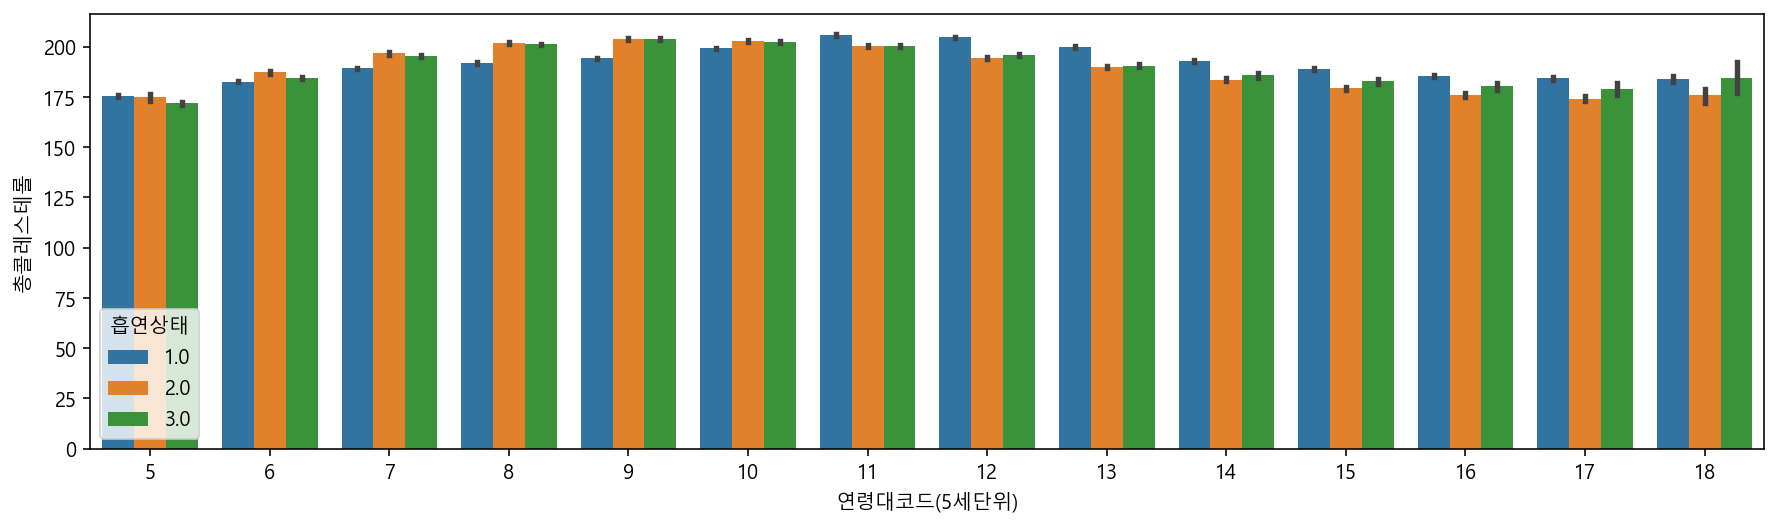

In [52]:
plt.figure(figsize=(15,4))

sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

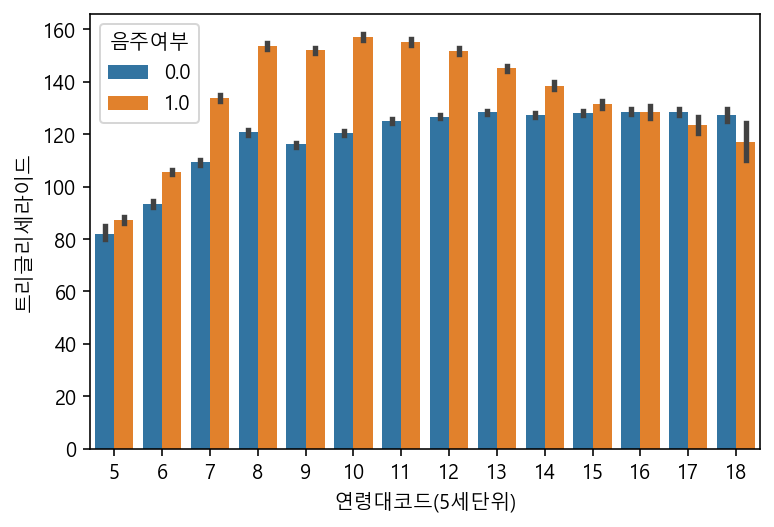

In [53]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=95)

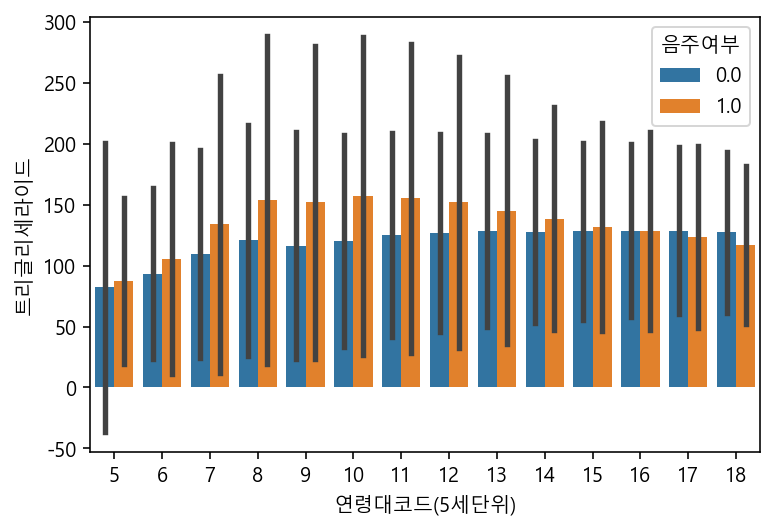

In [54]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci="sd")

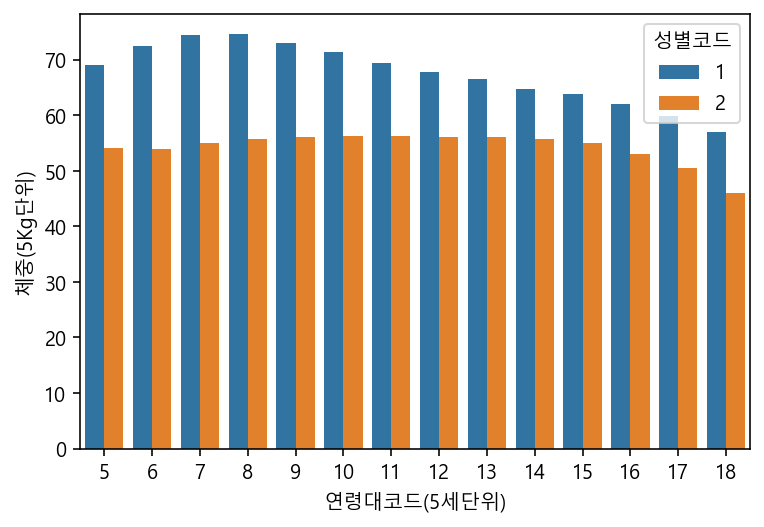

In [55]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci=None)

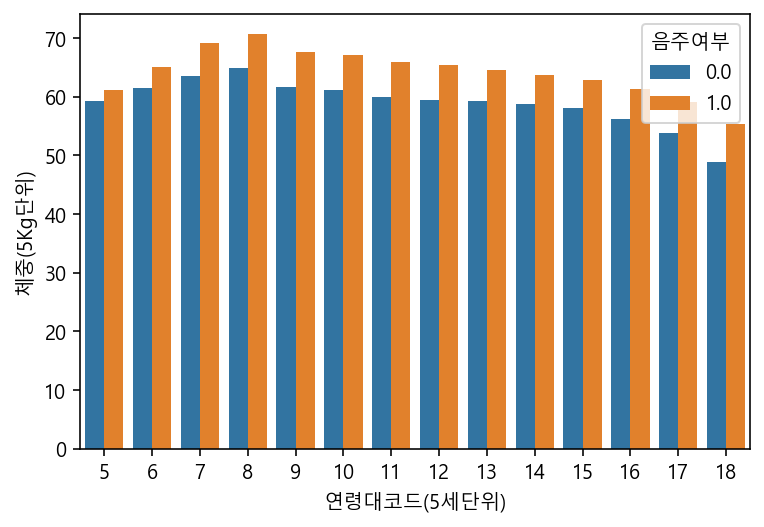

In [56]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci=None)

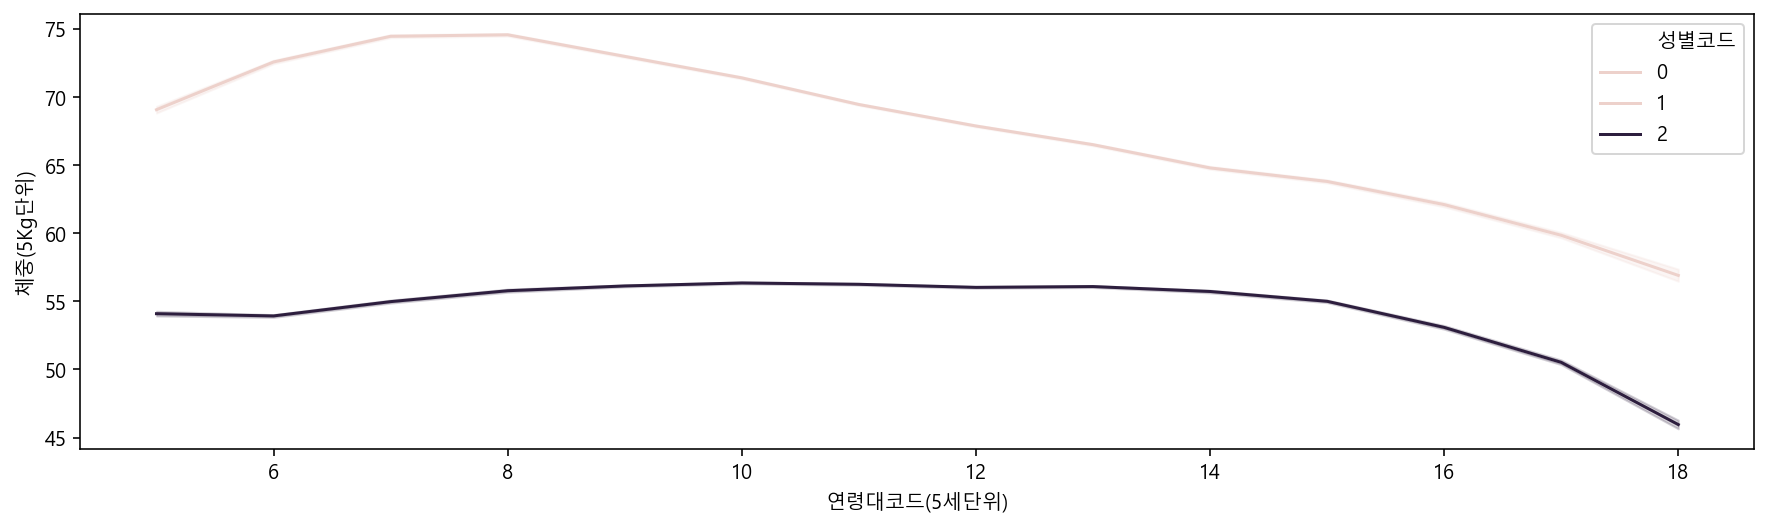

In [58]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")

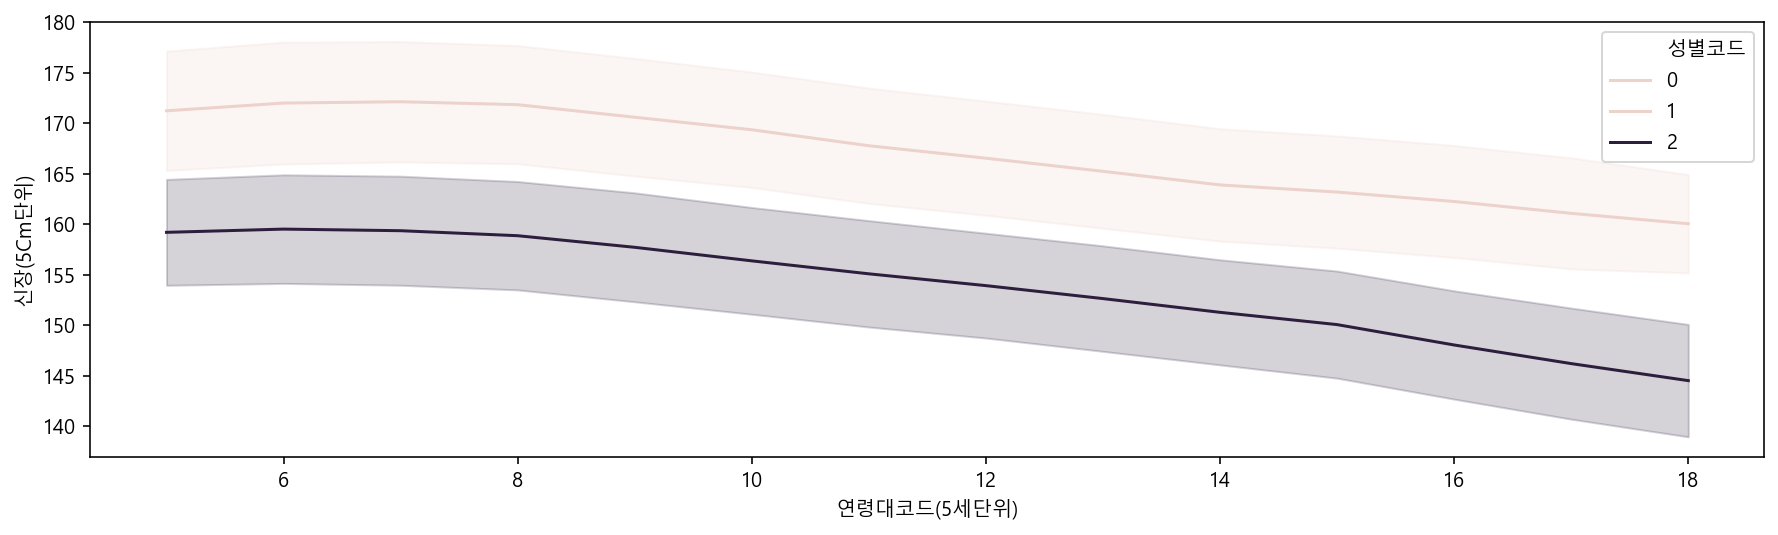

In [61]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

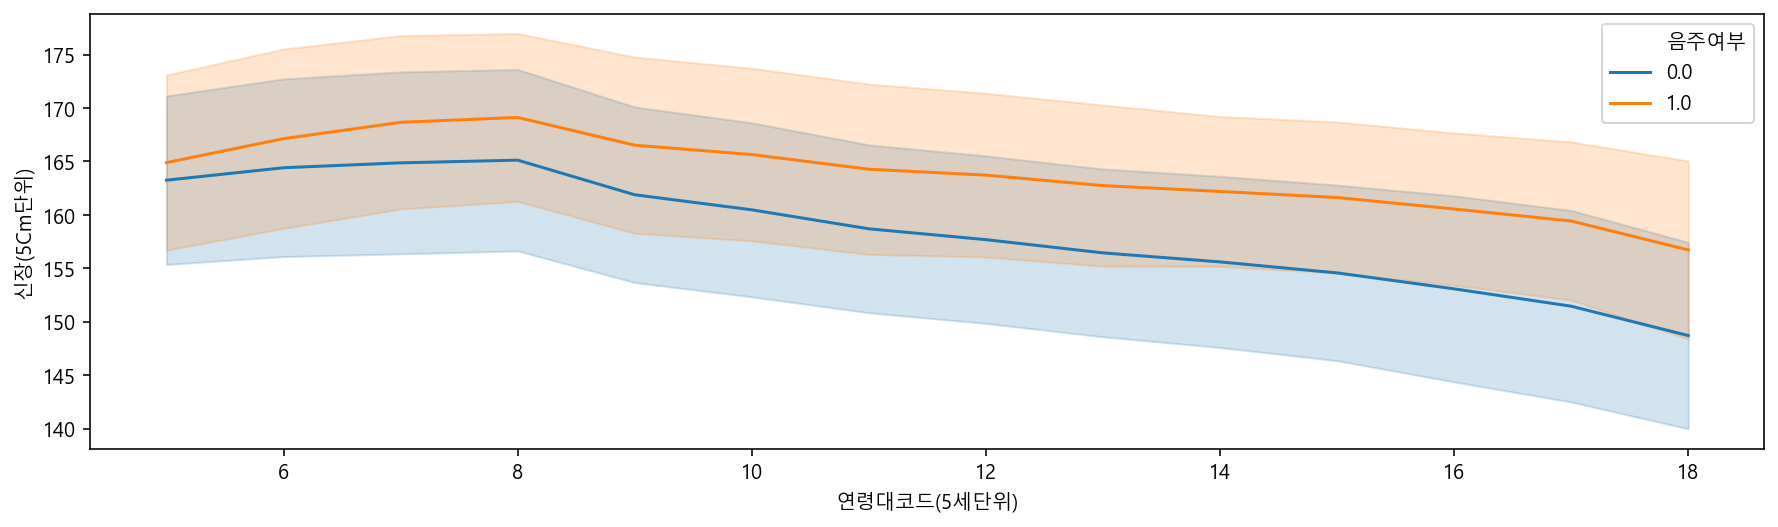

In [64]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

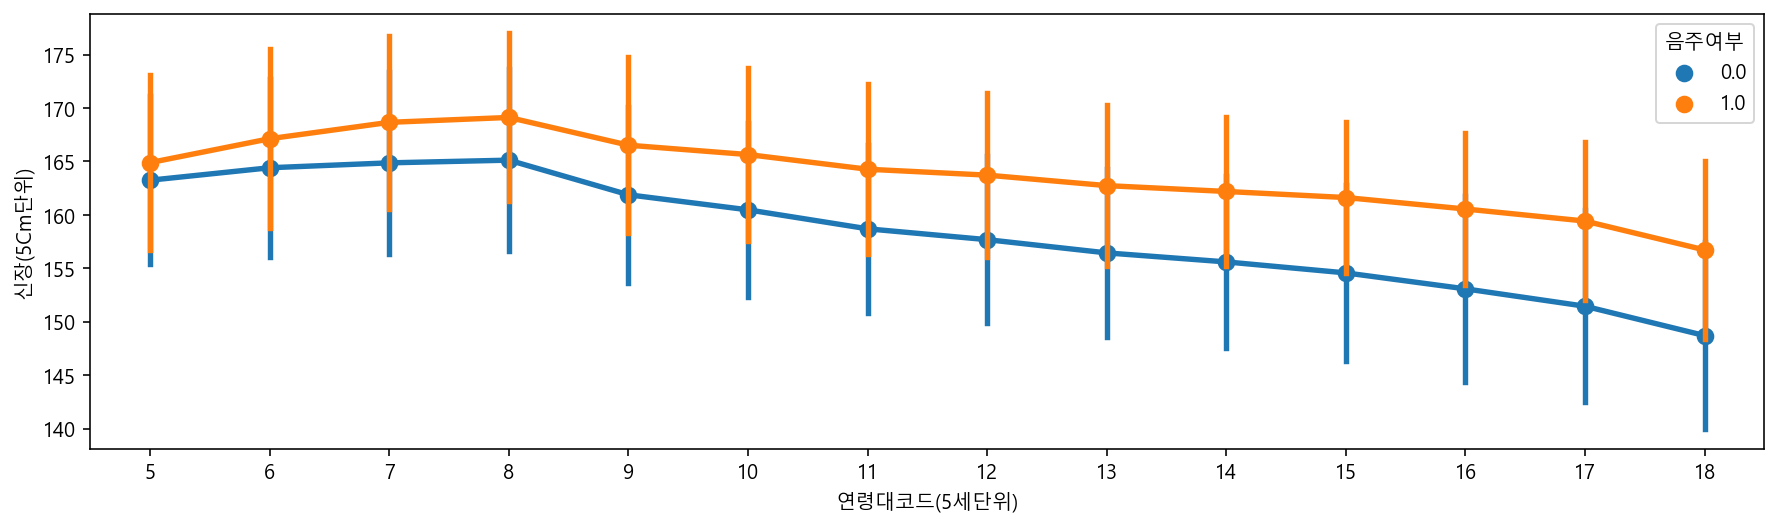

In [65]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

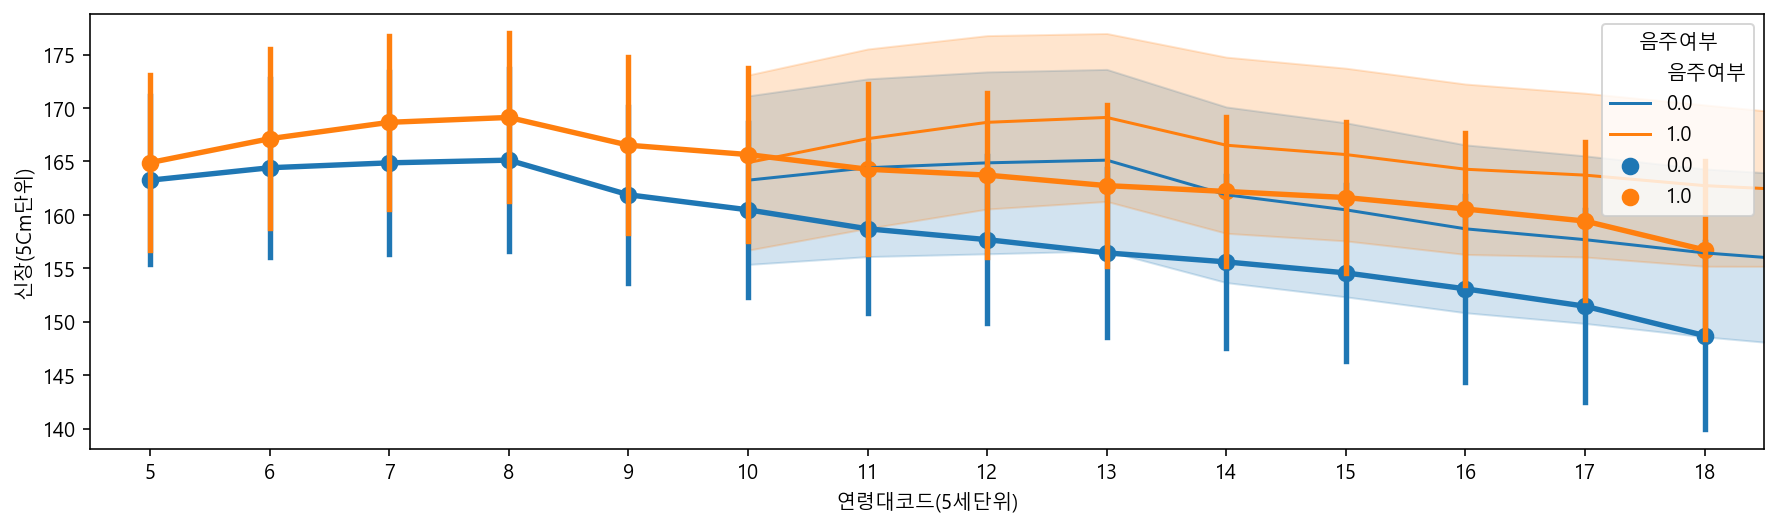

In [66]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

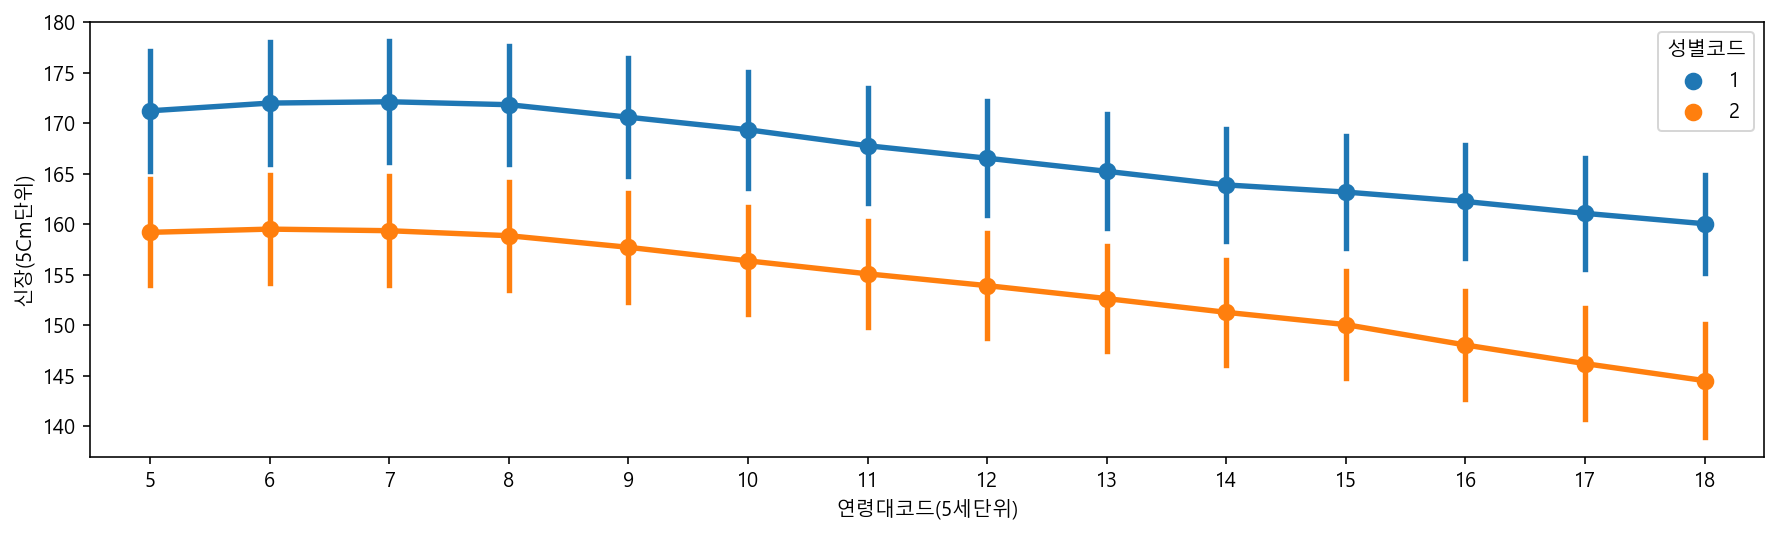

In [67]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

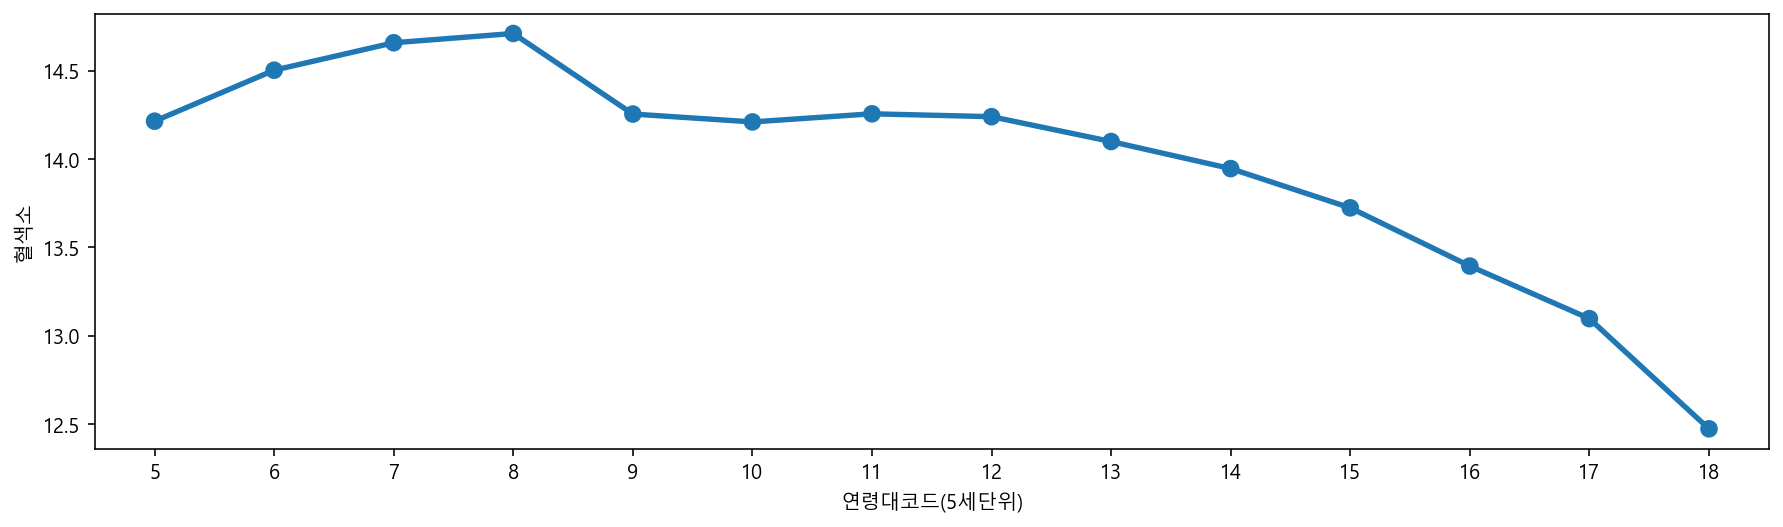

In [68]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="혈색소", ci=None)

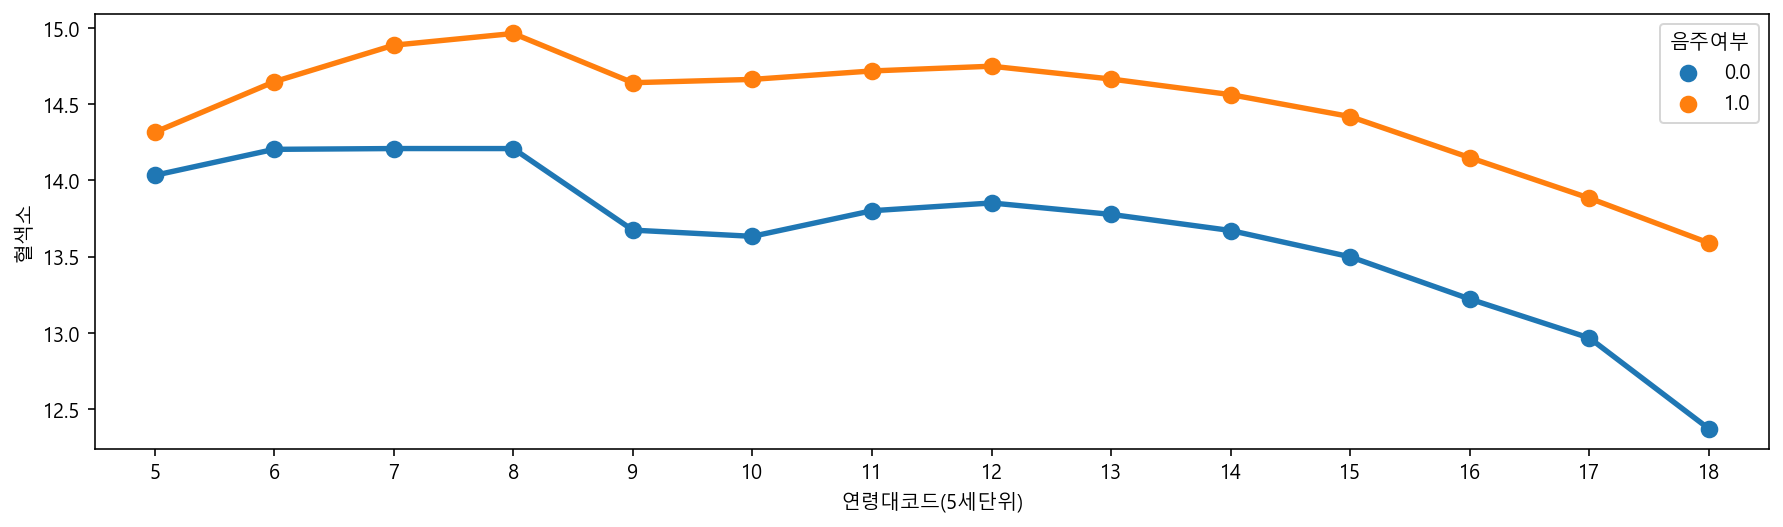

In [70]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

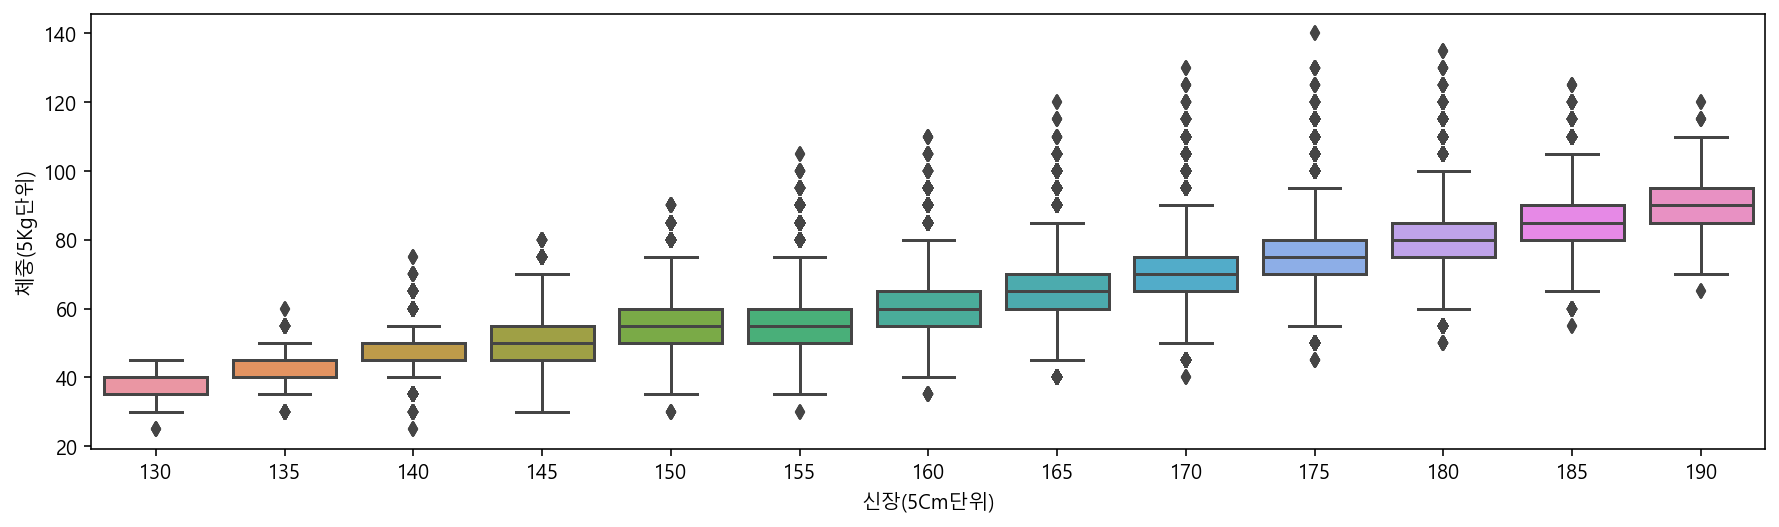

In [71]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)")

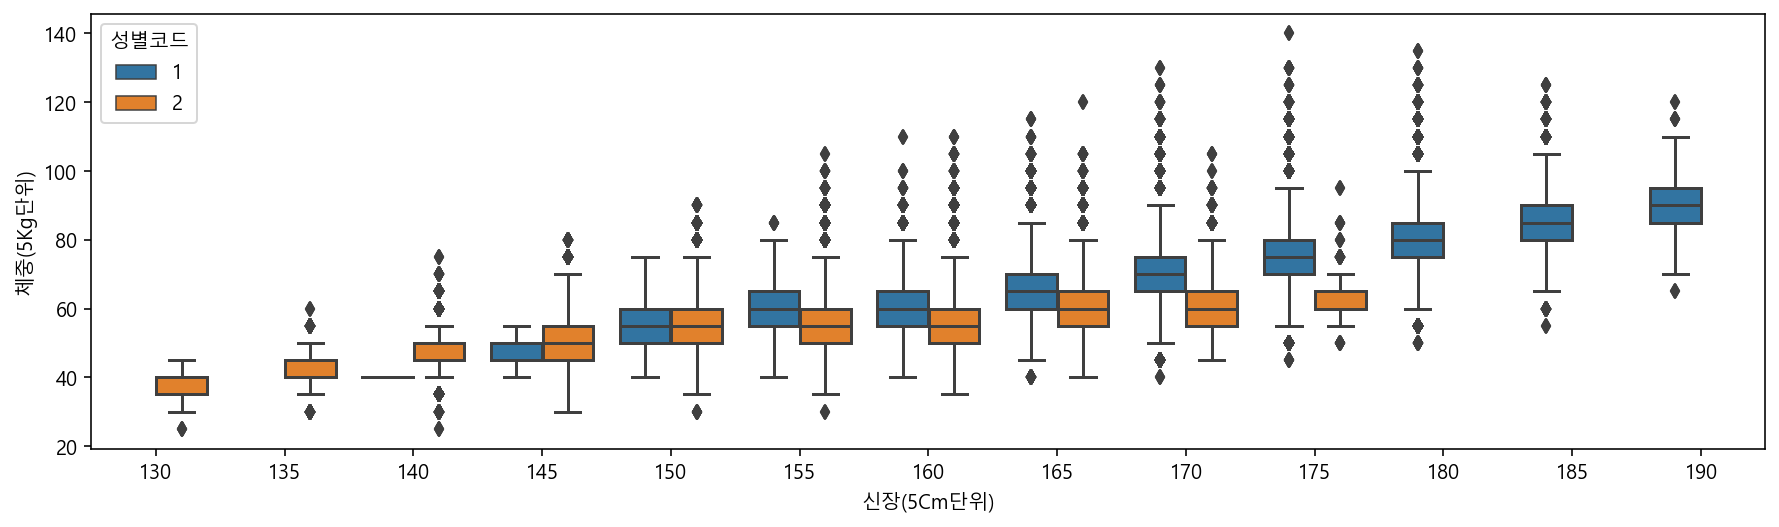

In [73]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")

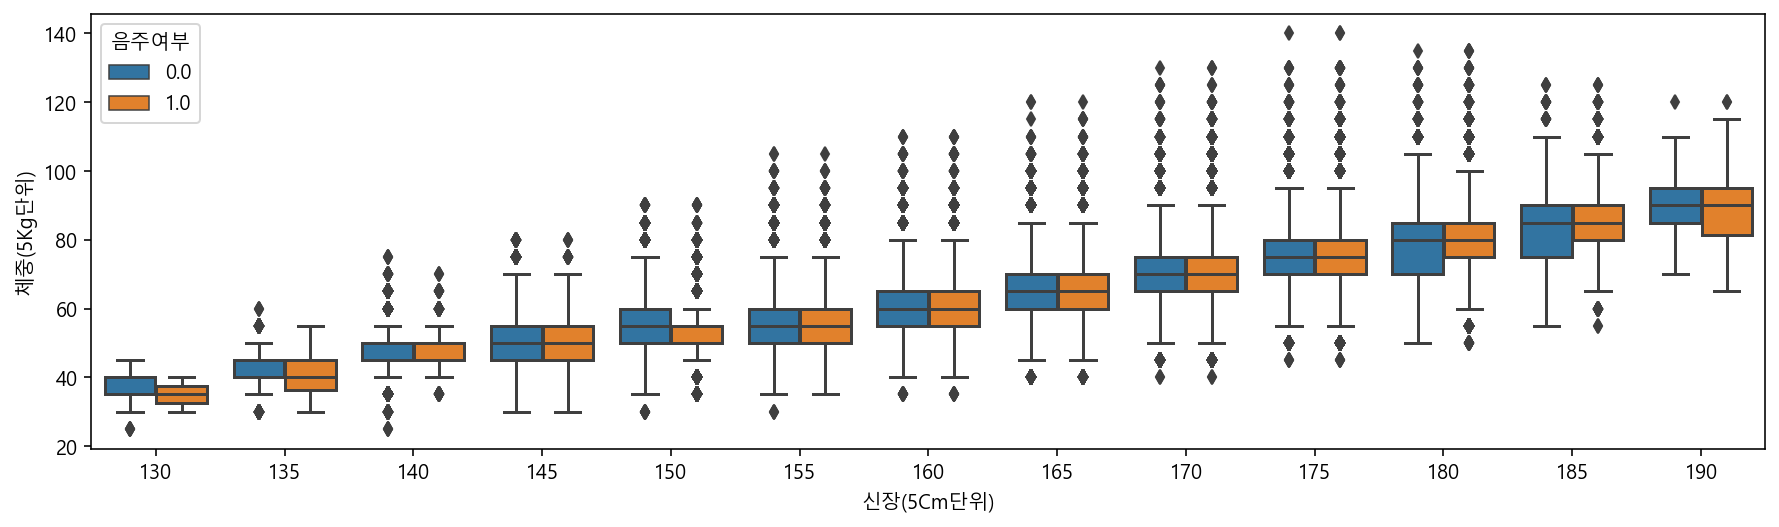

In [74]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

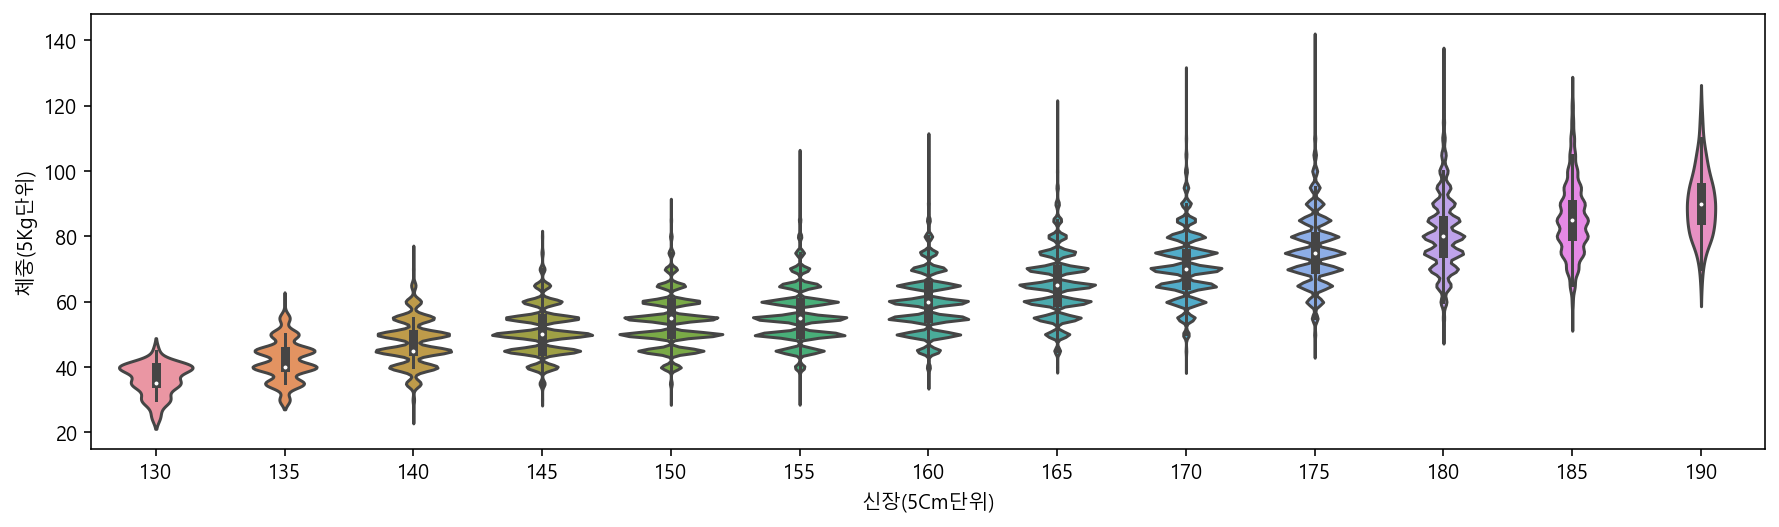

In [75]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)")

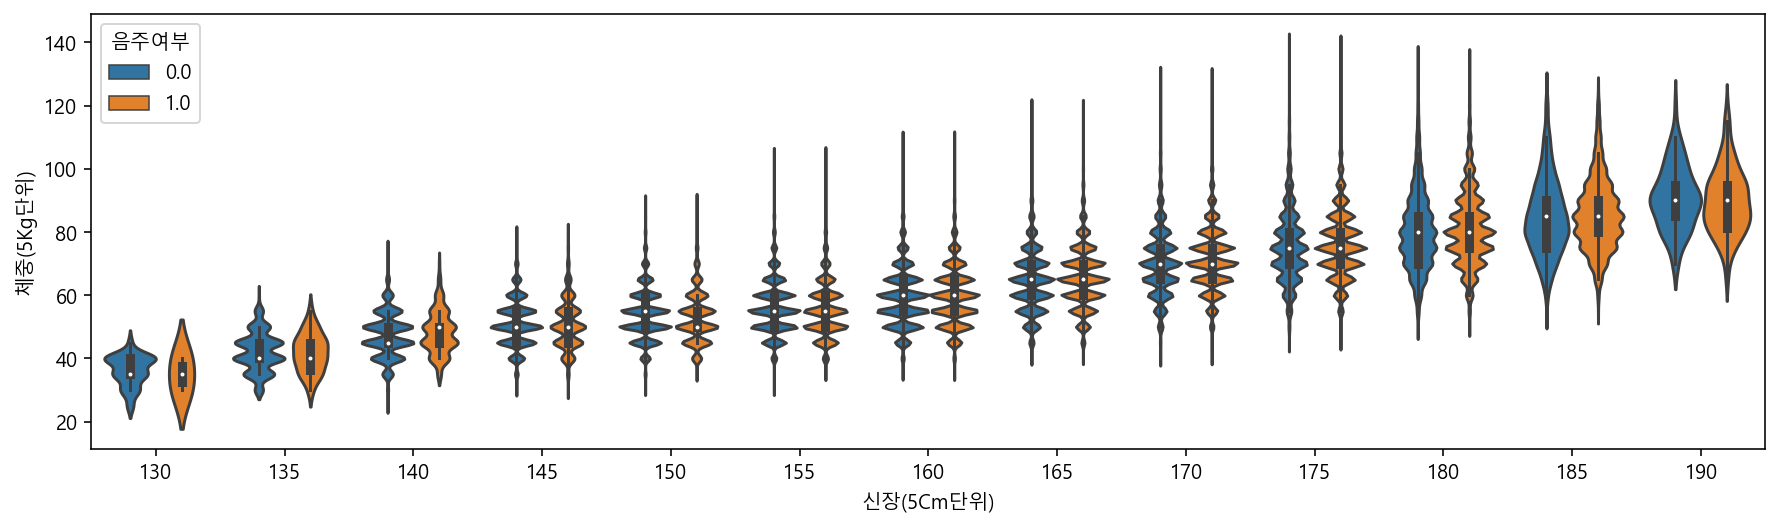

In [77]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

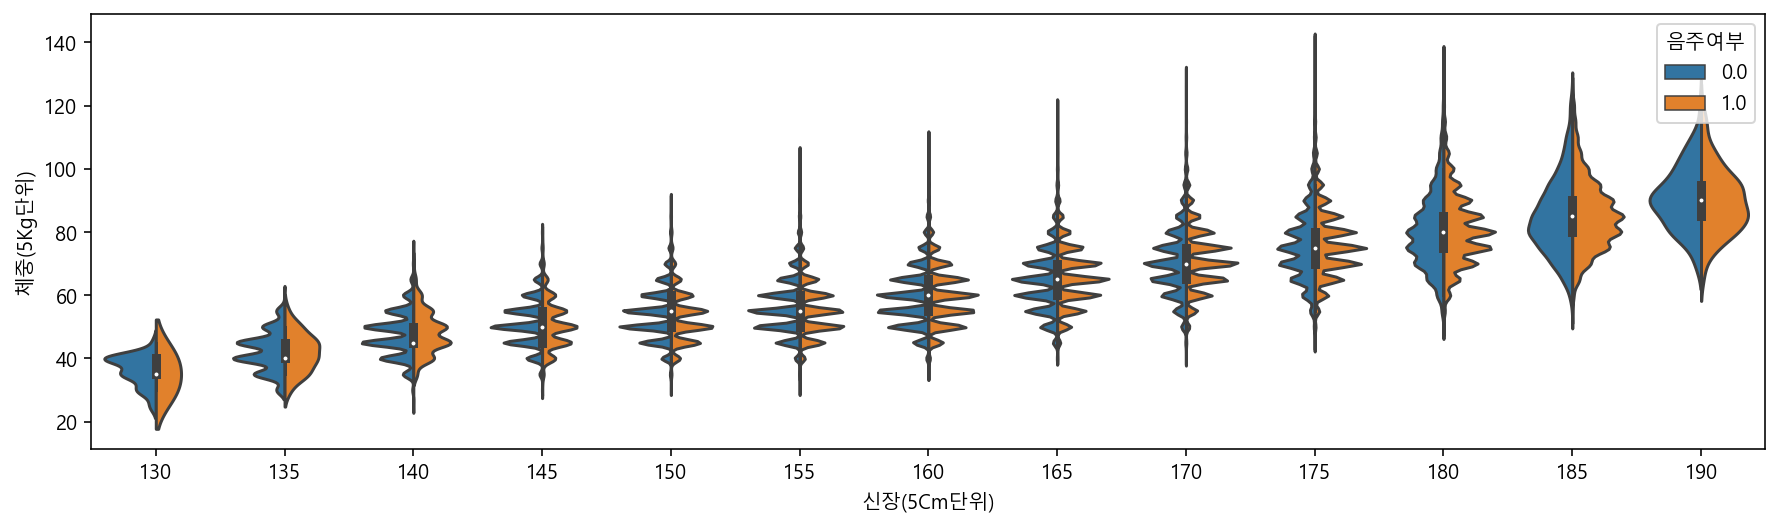

In [78]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", split=True)

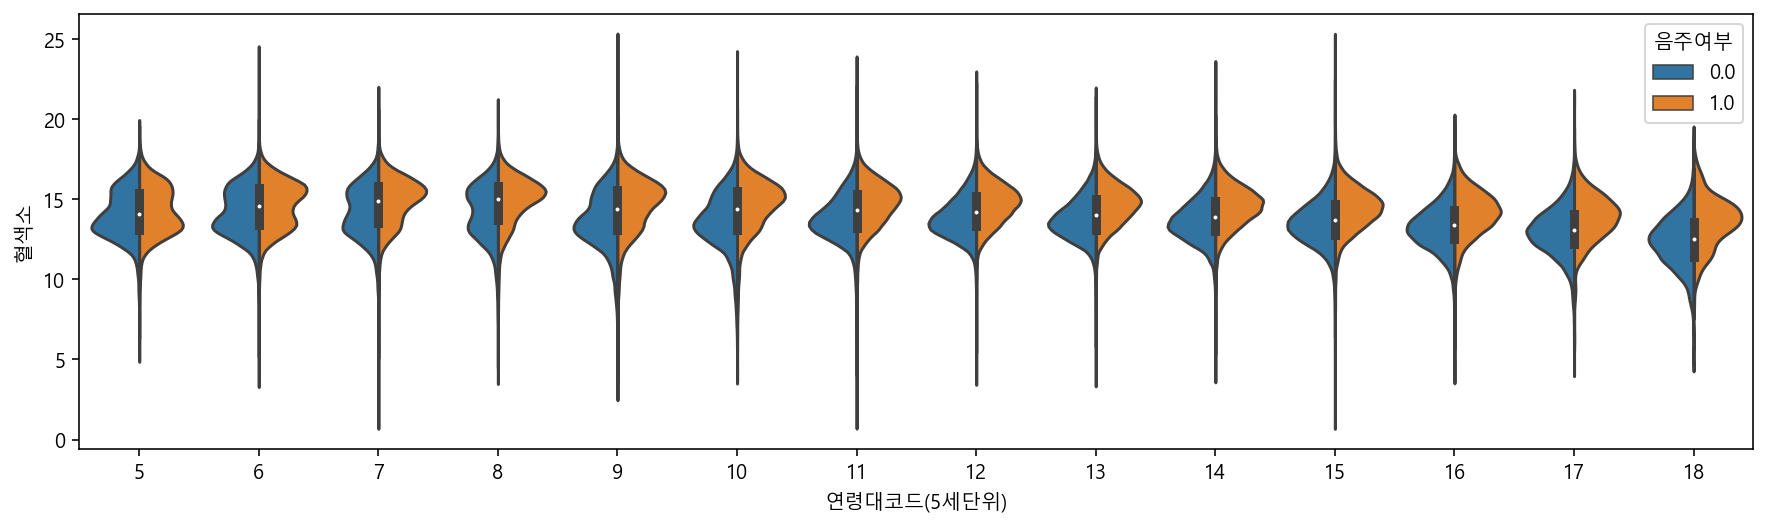

In [79]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

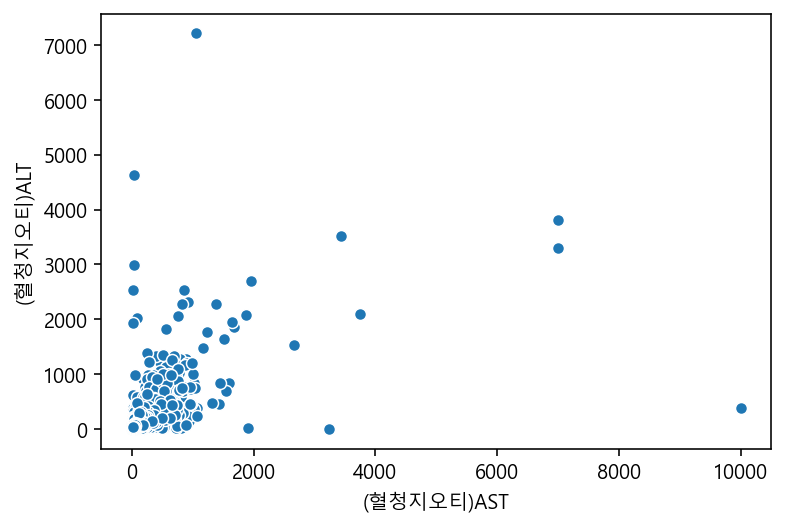

In [84]:
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT")

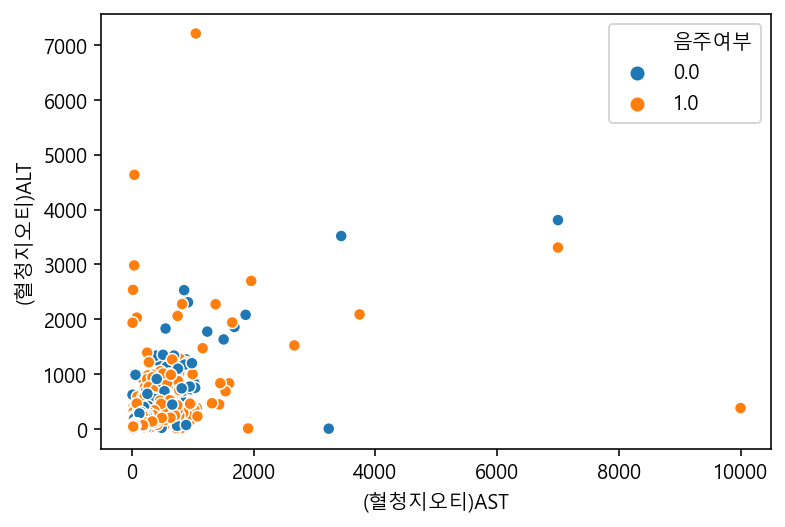

In [86]:
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

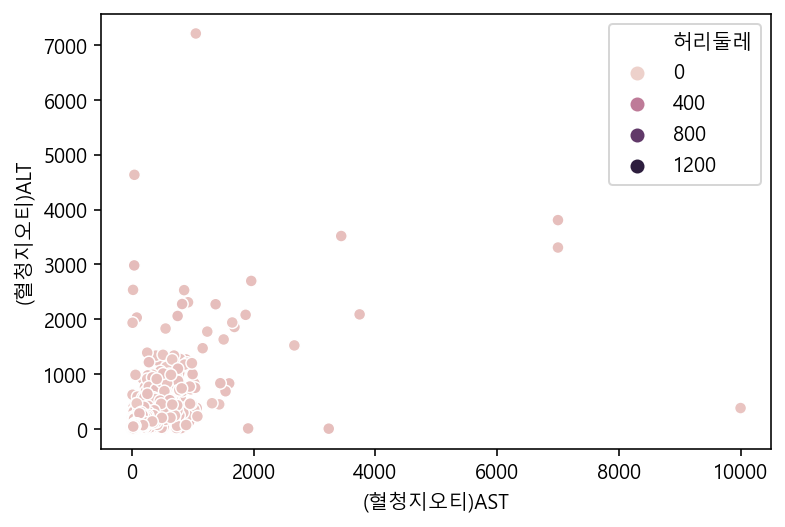

In [88]:
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="허리둘레")

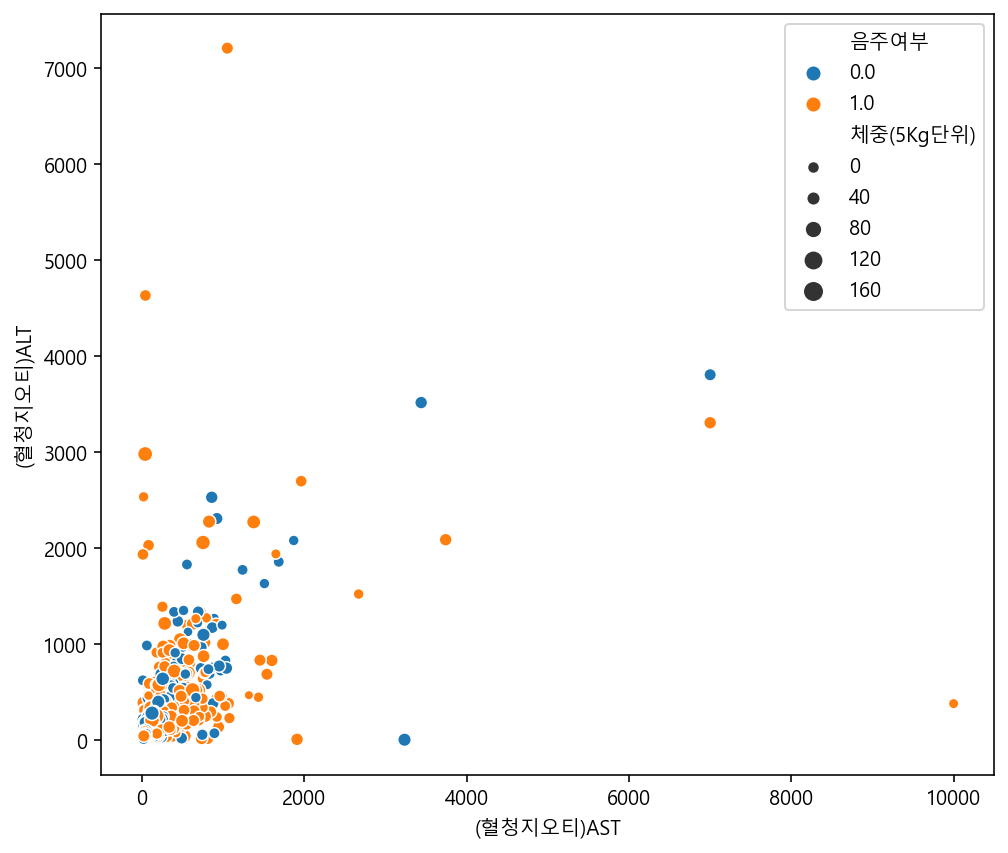

In [90]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg단위)")

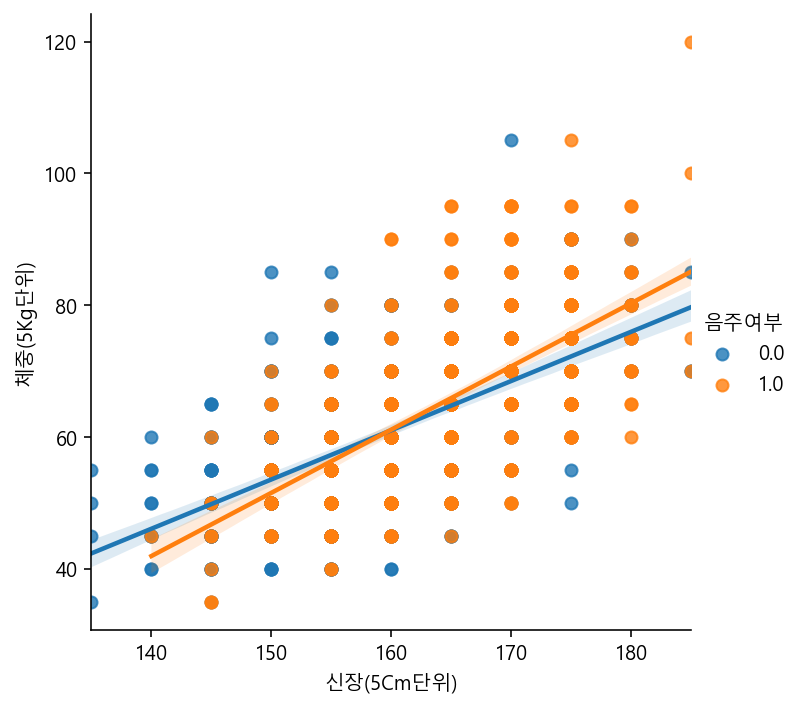

In [94]:
sns.lmplot(data=df.head(n=1000), x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

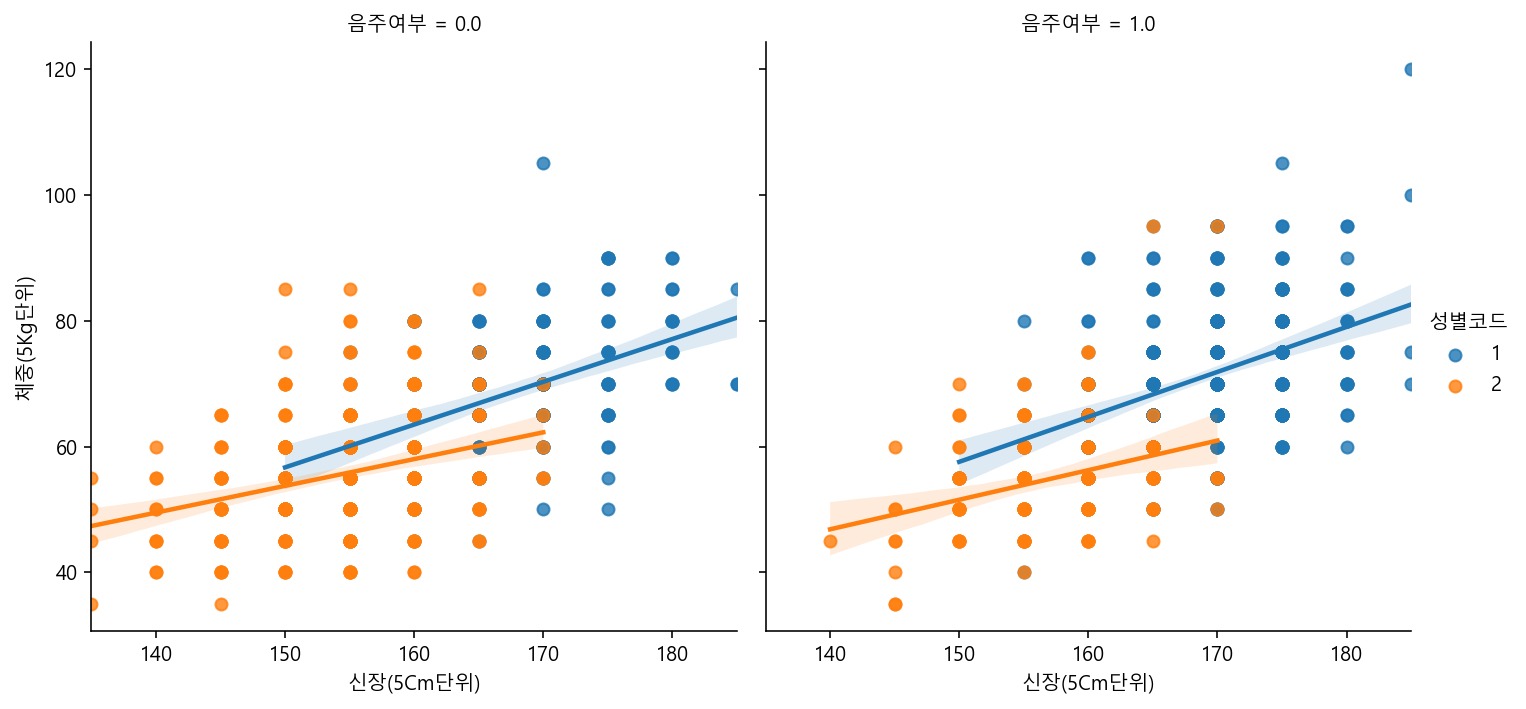

In [95]:
sns.lmplot(data=df.head(n=1000), x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드", col = "음주여부")

In [96]:
df_ASLT = df[(df["(혈청지오티)AST"] < 400) & (df["(혈청지오티)ALT"] < 400)]
df_ASLT

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,27.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


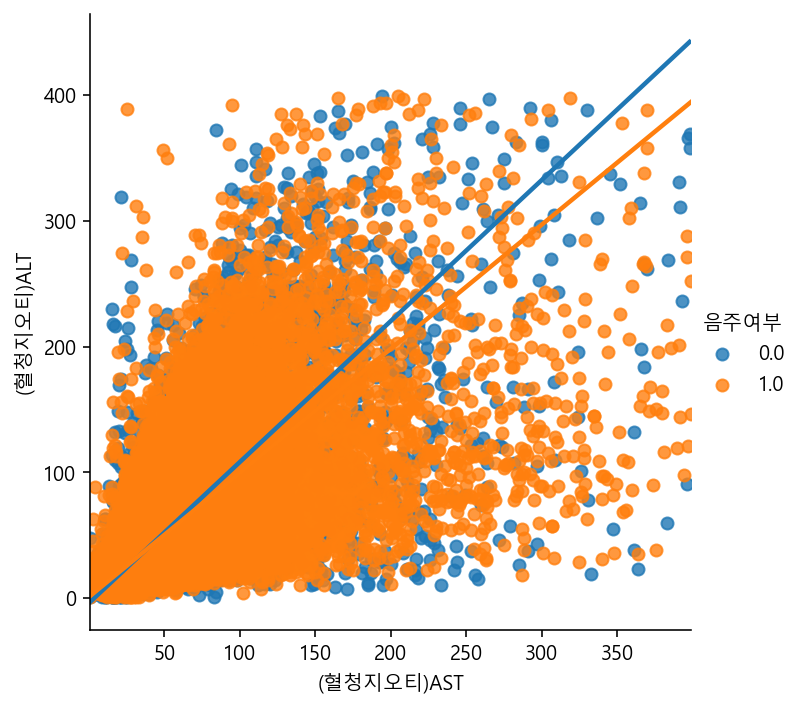

In [97]:
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [98]:
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
4754,2017,4755,1,9,41,170,55,74.0,1.0,0.7,...,125.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
15820,2017,15821,2,13,45,150,55,83.0,0.6,1.2,...,999.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
17830,2017,17831,2,8,41,150,50,64.6,1.2,1.2,...,111.0,3.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
19949,2017,19950,1,6,41,170,105,103.0,1.0,1.2,...,133.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
26464,2017,26465,1,7,41,175,70,82.0,1.2,1.2,...,169.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982305,2017,982306,2,16,28,155,50,79.3,0.4,0.7,...,71.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
990867,2017,990868,2,11,41,145,45,75.0,0.9,1.2,...,279.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
991226,2017,991227,1,6,42,170,80,81.0,0.7,0.8,...,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
992747,2017,992748,2,10,41,165,40,58.0,0.9,0.7,...,777.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


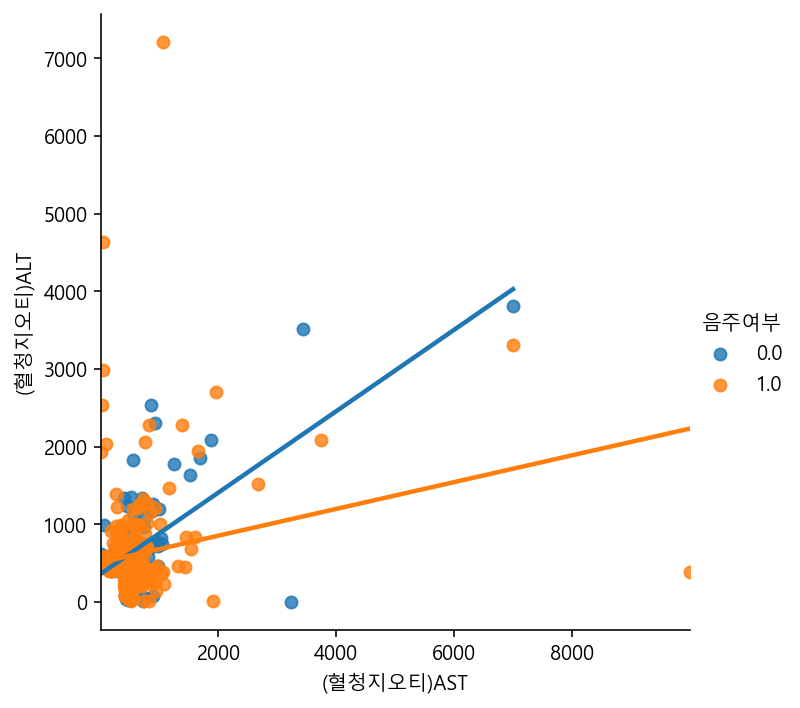

In [99]:
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [100]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
541757,1.0,1.0,96.0,74.0,93.0,161.0,67.0,78.0,69.0,15.4,1.0,1.2,9999.0,380.0,419.0,3.0,1.0


In [101]:
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol.head()

0    193.0
1    228.0
2    136.0
3    201.0
4    199.0
Name: 총콜레스테롤, dtype: float64

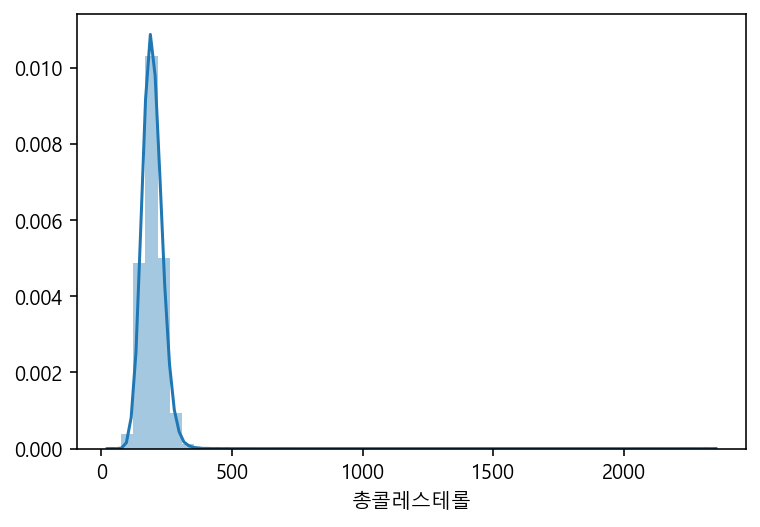

In [102]:
sns.distplot(df_chol)

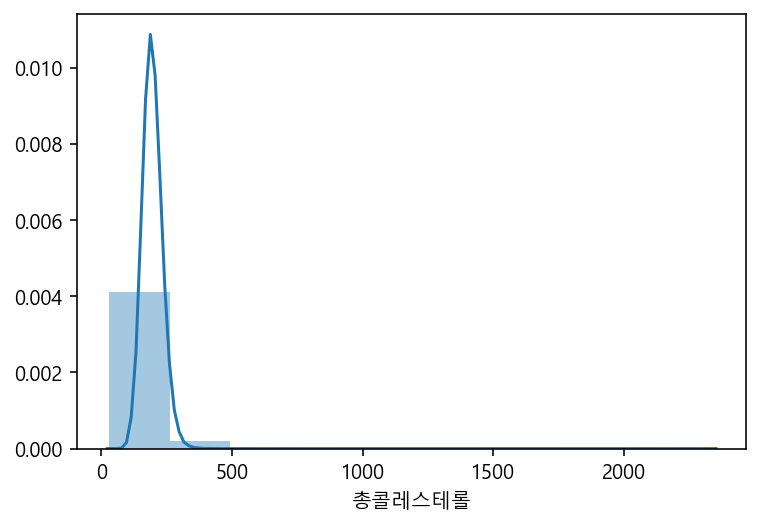

In [103]:
 sns.distplot(df_chol, bins=10)

In [104]:
df[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1)]

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
5,2017,6,1,11,41,165,55,75.0,1.2,1.5,...,37.0,3.0,1.0,1,NaN,NaN,NaN,NaN,2.0,20181126
7,2017,8,1,8,48,175,65,84.2,1.2,1.0,...,35.0,3.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126
8,2017,9,1,12,41,170,75,84.0,1.2,0.9,...,26.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
9,2017,10,1,9,41,175,75,82.0,1.5,1.5,...,16.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,2017,999991,1,17,11,170,60,74.0,1.0,0.9,...,15.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999992,2017,999993,1,5,11,175,65,74.5,1.0,1.5,...,50.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999993,2017,999994,1,15,42,165,60,78.0,0.9,0.8,...,32.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


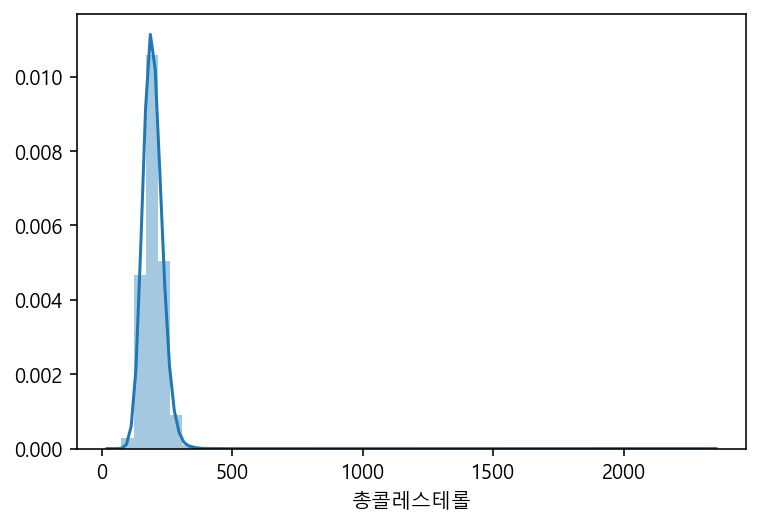

In [105]:
sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"])

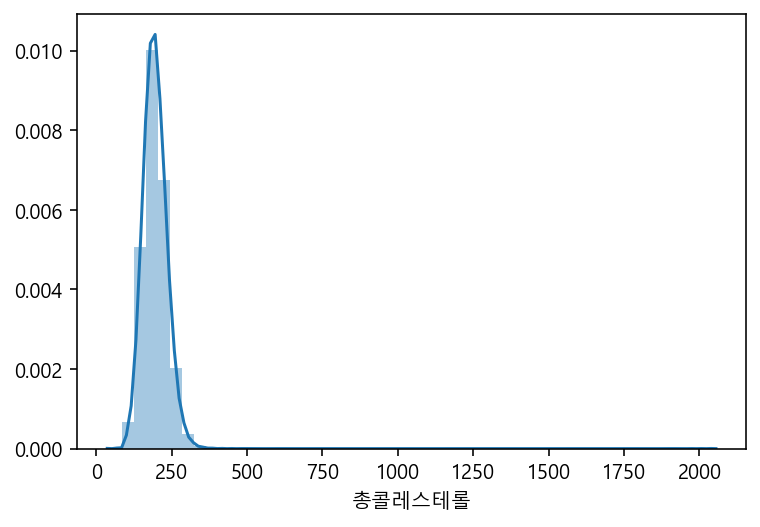

In [106]:
sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 0), "총콜레스테롤"])

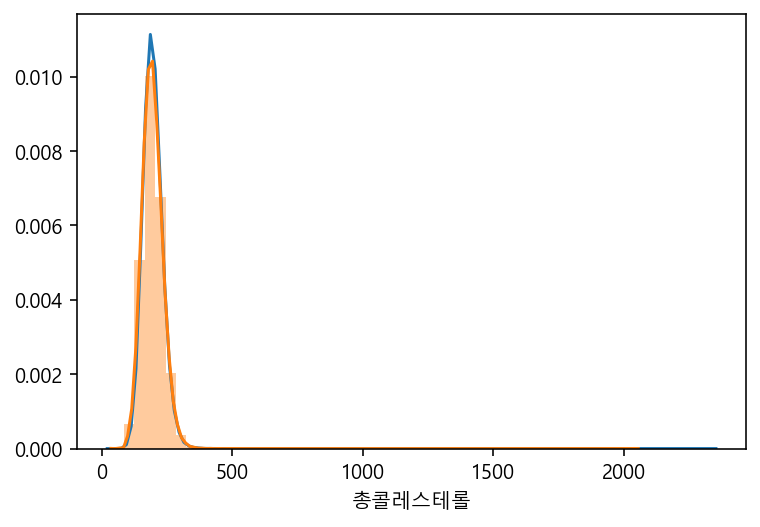

In [107]:
sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"], hist=False)
sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 0), "총콜레스테롤"])

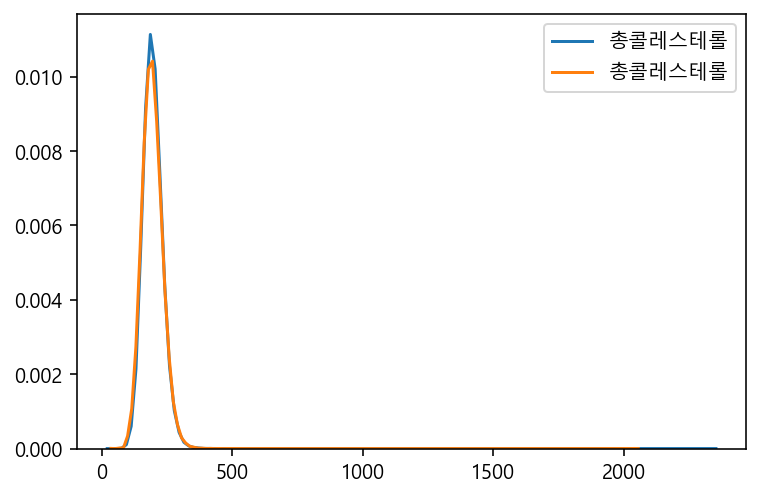

In [108]:
sns.kdeplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"])
sns.kdeplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 0), "총콜레스테롤"])

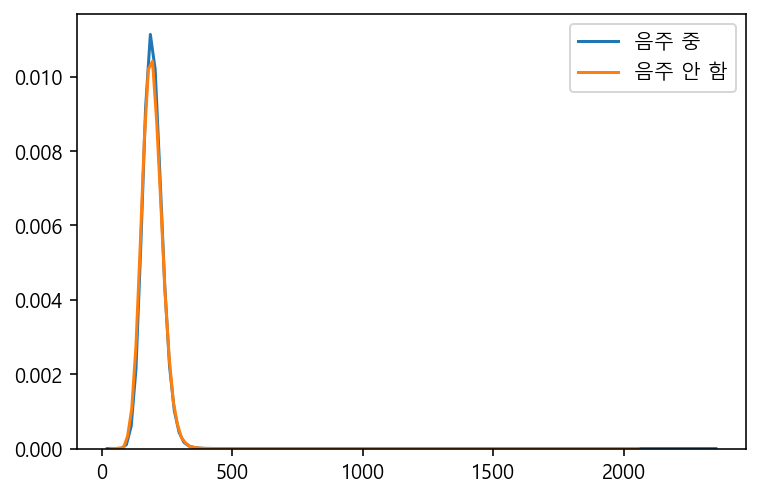

In [109]:
sns.kdeplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")

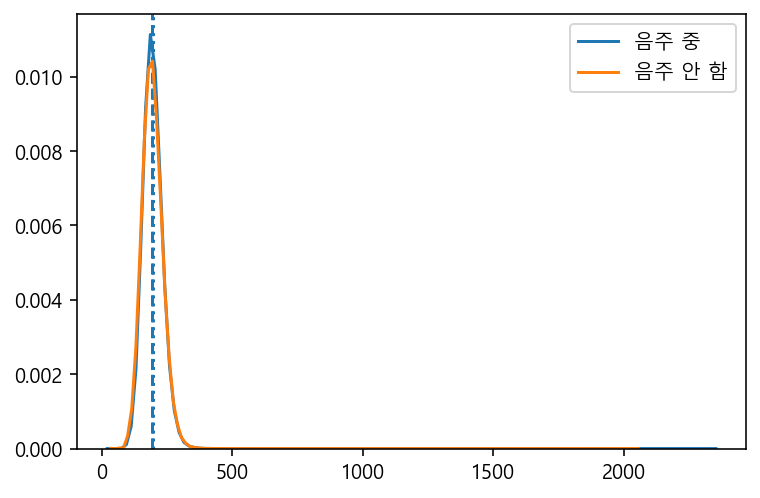

In [113]:
plt.axvline(df["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == 0), "총콜레스테롤"], label="음주 안 함")

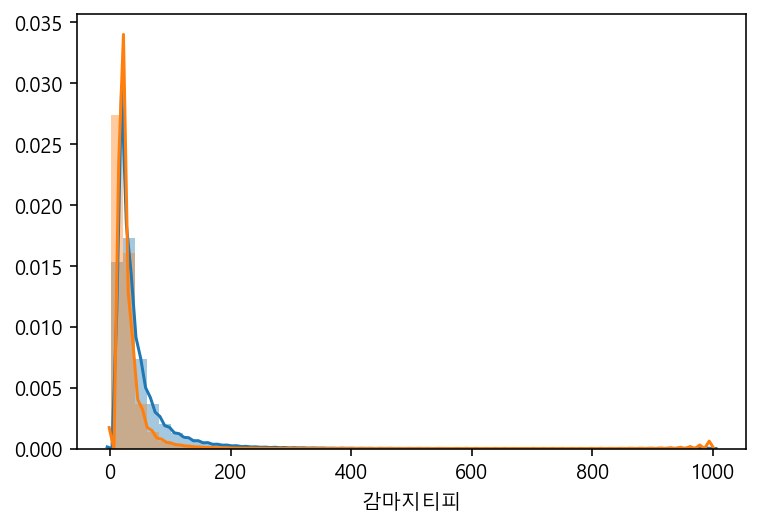

In [117]:
s_1 = df.loc[df["음주여부"] == 1, "감마지티피"]
s_0 = df.loc[df["음주여부"] == 0, "감마지티피"]

sns.distplot(s_1, label="음주 중")
sns.distplot(s_0, label="음주 중")

In [122]:
columns = ["연령대코드(5세단위)","체중(5Kg단위)","신장(5Cm단위)","허리둘레","시력(좌)","시력(우)","청력(좌)","청력(우)"]
df_sample = df.head(n=1000)
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

,연령대코드(5세단위),체중(5Kg단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우)
연령대코드(5세단위),1.000000,-0.149861,-0.386351,0.200078,-0.133115,-0.075499,0.125023,0.125023
체중(5Kg단위),-0.149861,1.000000,0.655597,0.785318,0.135715,0.118171,-0.024419,-0.021886
신장(5Cm단위),-0.386351,0.655597,1.000000,0.282550,0.149795,0.131607,-0.043380,-0.026893
허리둘레,0.200078,0.785318,0.282550,1.000000,0.081899,0.070075,0.012481,0.021549
시력(좌),-0.133115,0.135715,0.149795,0.081899,1.000000,0.351166,0.087834,-0.023428
시력(우),-0.075499,0.118171,0.131607,0.070075,0.351166,1.000000,0.067400,0.040301
청력(좌),0.125023,-0.024419,-0.043380,0.012481,0.087834,0.067400,1.000000,0.407677
청력(우),0.125023,-0.021886,-0.026893,0.021549,-0.023428,0.040301,0.407677,1.000000


In [124]:
df_corr["신장(5Cm단위)"].sort_values()

연령대코드(5세단위)   -0.386351
청력(좌)         -0.043380
청력(우)         -0.026893
시력(우)          0.131607
시력(좌)          0.149795
허리둘레           0.282550
체중(5Kg단위)      0.655597
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [126]:
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]


체중(5Kg단위)    0.655597
신장(5Cm단위)    1.000000
Name: 신장(5Cm단위), dtype: float64

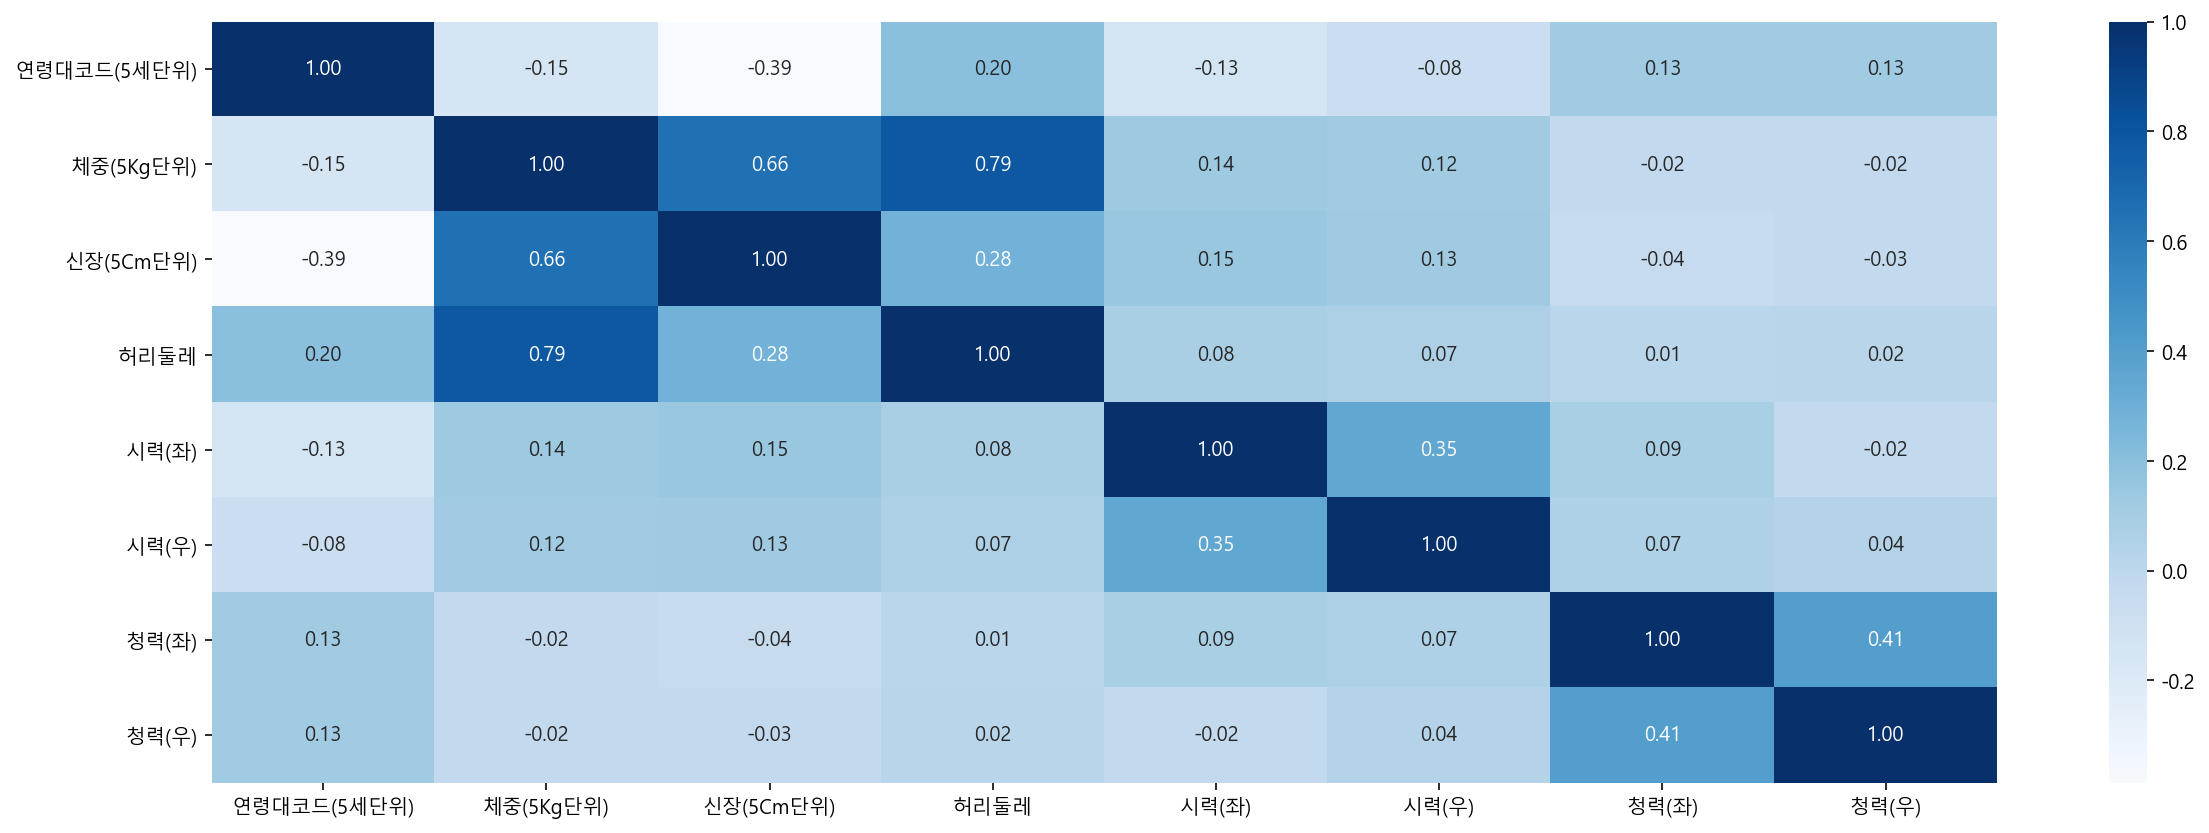

In [127]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

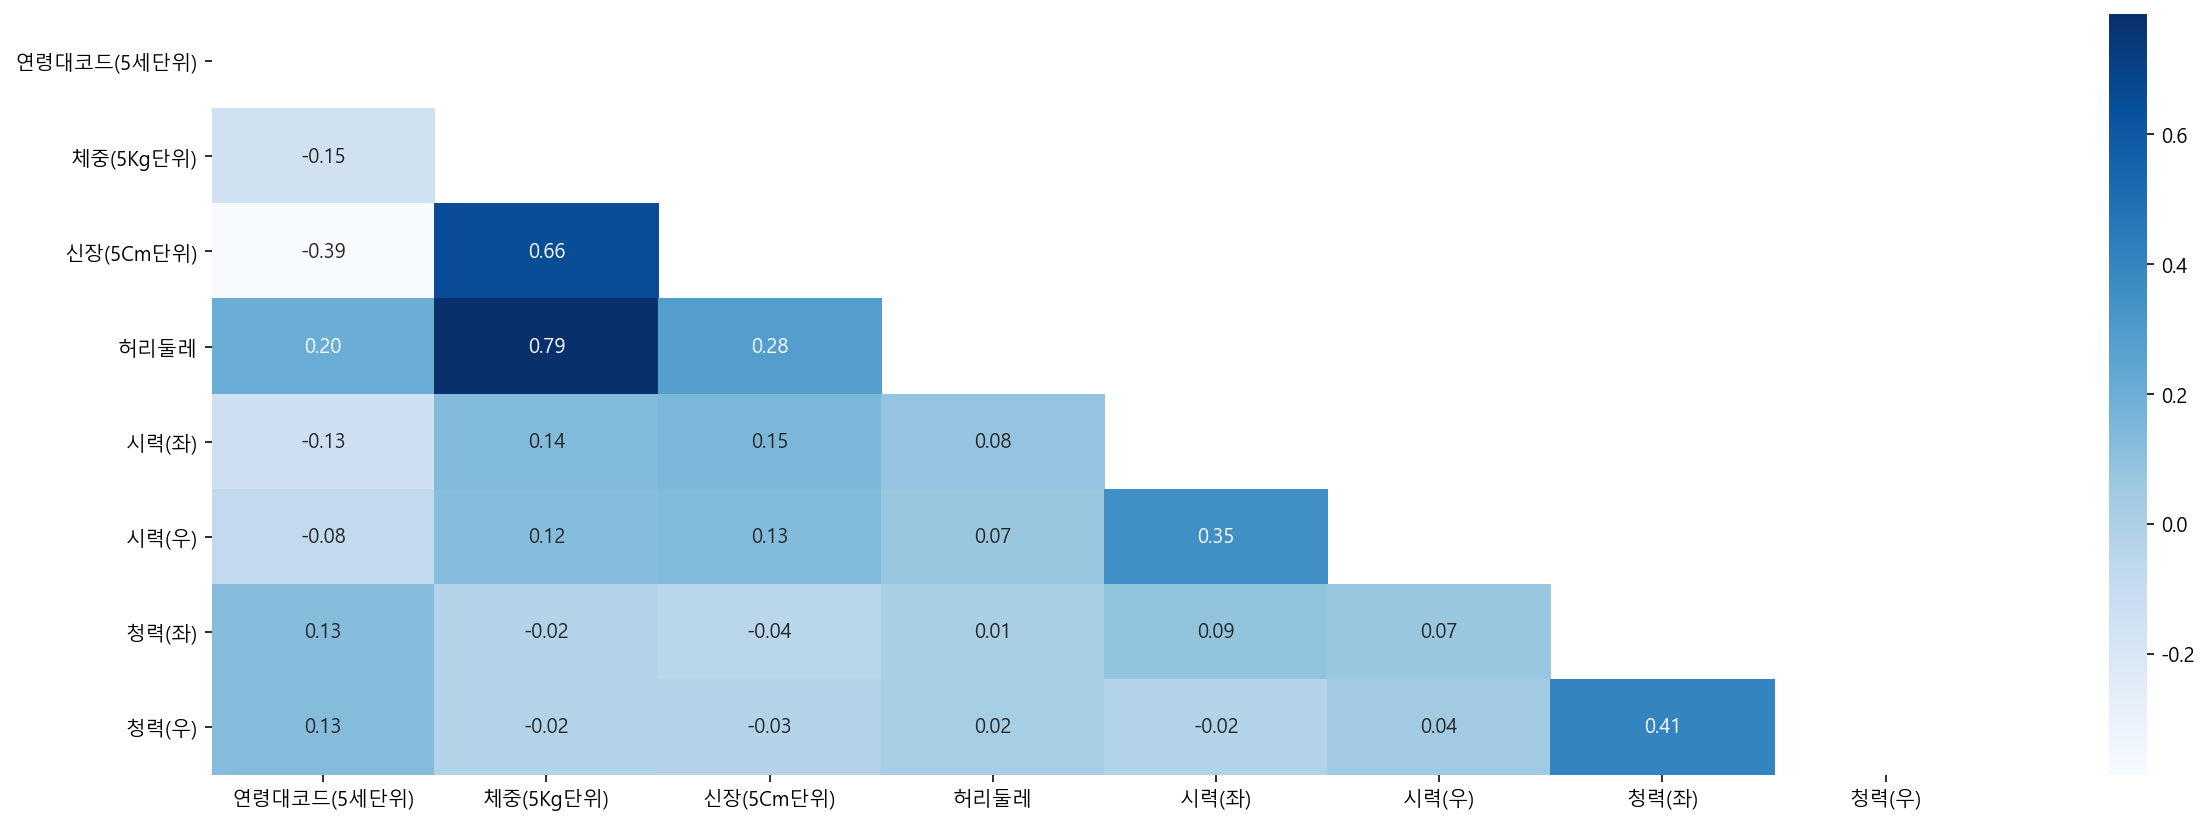

In [129]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)